<a href="https://colab.research.google.com/github/kaviyarasanEaswaran/Akaike-Assignment/blob/main/Telecom_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Overview**

In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [4]:
#load the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/telecom.csv")

In [5]:
#dataset overview
print(df.shape)
df.head()

(5986, 22)


Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      88   
1        4528  9688-YGXVR  Female              0      No         No      44   
2        6344  9286-DOJGF  Female              1     Yes         No      38   
3        6739  6994-KERXL    Male              0      No         No       4   
4         432  2181-UAESM    Male              0      No         No       2   

  PhoneService MultipleLines InternetService       OnlineSecurity  \
0          Yes           Yes              No  No internet service   
1          Yes            No     Fiber optic                   No   
2          Yes           Yes     Fiber optic                   No   
3          Yes            No             DSL                   No   
4          Yes            No             DSL                  Yes   

          OnlineBackup     DeviceProtection          TechSupport  \
0  No internet service  No internet service  No internet service   
1                  Yes                  Yes                   No   
2                   No                   No                   No   
3                   No                   No                   No   
4                   No                  Yes                   No   

           StreamingTV      StreamingMovies        Contract PaperlessBilling  \
0  No internet service  No internet service        Two year               No   
1                  Yes                   No  Month-to-month              Yes   
2                   No                   No  Month-to-month              Yes   
3                   No                  Yes  Month-to-month              Yes   
4                   No                   No  Month-to-month               No   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0    Credit card (automatic)           24.10      1734.65    No  
1    Credit card (automatic)           88.15       3973.2    No  
2  Bank transfer (automatic)           74.95      2869.85   Yes  
3           Electronic check           55.90        238.5    No  
4           Electronic check           53.45        119.5    No



```
There is no need of unnamed 0 and customerID columns because cutomerID coulmn is randomly created one.
```



In [6]:
df.drop(['Unnamed: 0','customerID'],axis=1,inplace=True)

In [7]:
#check and remove duplicates
df.duplicated().sum()

16

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0



```
There is no duplicates from this dataset
```



In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
#type conversion
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [12]:
df.TotalCharges.dtypes

dtype('float64')

In [13]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [14]:
#imputing the values in TotalCharges column based on the contract period
df[df.TotalCharges.isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
356     Male              0      No        Yes       0          Yes   
634   Female              0     Yes        Yes       0           No   
2771    Male              0     Yes        Yes       0          Yes   
3086    Male              0     Yes        Yes       0          Yes   
3255    Male              0     Yes        Yes       0          Yes   
4326  Female              0     Yes        Yes       0          Yes   
5375    Male              0      No        Yes       0          Yes   
5382  Female              0     Yes        Yes       0          Yes   
5695  Female              0     Yes        Yes       0           No   
5951    Male              0     Yes        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
356                Yes             DSL                  Yes   
634   No phone service             DSL                  Yes   
2771               Yes              No  No internet service   
3086                No              No  No internet service   
3255                No              No  No internet service   
4326                No             DSL                  Yes   
5375                No              No  No internet service   
5382                No              No  No internet service   
5695  No phone service             DSL                  Yes   
5951               Yes              No  No internet service   

             OnlineBackup     DeviceProtection          TechSupport  \
356                   Yes                   No                  Yes   
634                   Yes                  Yes                  Yes   
2771  No internet service  No internet service  No internet service   
3086  No internet service  No internet service  No internet service   
3255  No internet service  No internet service  No internet service   
4326                  Yes                  Yes                   No   
5375  No internet service  No internet service  No internet service   
5382  No internet service  No internet service  No internet service   
5695                   No                  Yes                  Yes   
5951  No internet service  No internet service  No internet service   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
356                    No                   No  Two year              Yes   
634                   Yes                   No  Two year               No   
2771  No internet service  No internet service  Two year               No   
3086  No internet service  No internet service  One year              Yes   
3255  No internet service  No internet service  Two year               No   
4326                  Yes                  Yes  Two year               No   
5375  No internet service  No internet service  Two year               No   
5382  No internet service  No internet service  Two year               No   
5695                  Yes                   No  Two year              Yes   
5951  No internet service  No internet service  Two year               No   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
356   Bank transfer (automatic)           61.90           NaN    No  
634     Credit card (automatic)           56.05           NaN    No  
2771               Mailed check           25.35           NaN    No  
3086               Mailed check           19.70           NaN    No  
3255               Mailed check           19.85           NaN    No  
4326               Mailed check           80.85           NaN    No  
5375               Mailed check           20.25           NaN    No  
5382               Mailed check           20.00           NaN    No  
5695  Bank transfer (automatic)           52.55           NaN    No  
5951               Mailed check           25.75           NaN    No

In [15]:
df.loc[(df['TotalCharges'].isnull()) & (df['Contract'] == 'Two year'), 'TotalCharges'] = 24 * df['MonthlyCharges']

In [16]:
df.loc[(df.TotalCharges.isnull()) & (df.Contract == 'One year'),'TotalCharges'] = 12*df.MonthlyCharges

In [17]:
df[df.TotalCharges.isnull()]

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []



```
we have imputed the Totalcharges column based on the contract period
```



In [18]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                74
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5620
Churn                  2
dtype: int64

In [19]:
#statistical information
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5970.000000  5970.000000     5970.000000    5970.00000
mean        0.161642    32.555779       64.871926    2301.76335
std         0.368152    24.500149       30.102688    2273.09106
min         0.000000     0.000000       18.250000      18.80000
25%         0.000000     9.000000       35.750000     412.56250
50%         0.000000    29.000000       70.450000    1414.55000
75%         0.000000    56.000000       89.937500    3847.90000
max         1.000000    88.000000      118.750000    8684.80000



```
SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months or 5 years

Average Monthly charges are USD 64.87 whereas 25% customers pay more than USD 89.93 per month

Average Total charges are USD 2301.09 whereas 25% customers pay more than USD 3847.90 per month
```



In [20]:
# Get the max tenure
print(df['tenure'].max()) #72

88


In [21]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 88, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 100, 12), right=False, labels=labels)

In [22]:
df['tenure_group'].value_counts()

1 - 12     1822
61 - 72    1194
13 - 24     859
25 - 36     722
49 - 60     710
37 - 48     652
85 - 96       1
73 - 84       0
Name: tenure_group, dtype: int64

In [23]:
df.drop('tenure', axis =1,inplace=True)

# **EDA-Exploratory Data Analysis**

## **Univariate Analysis**

In [24]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

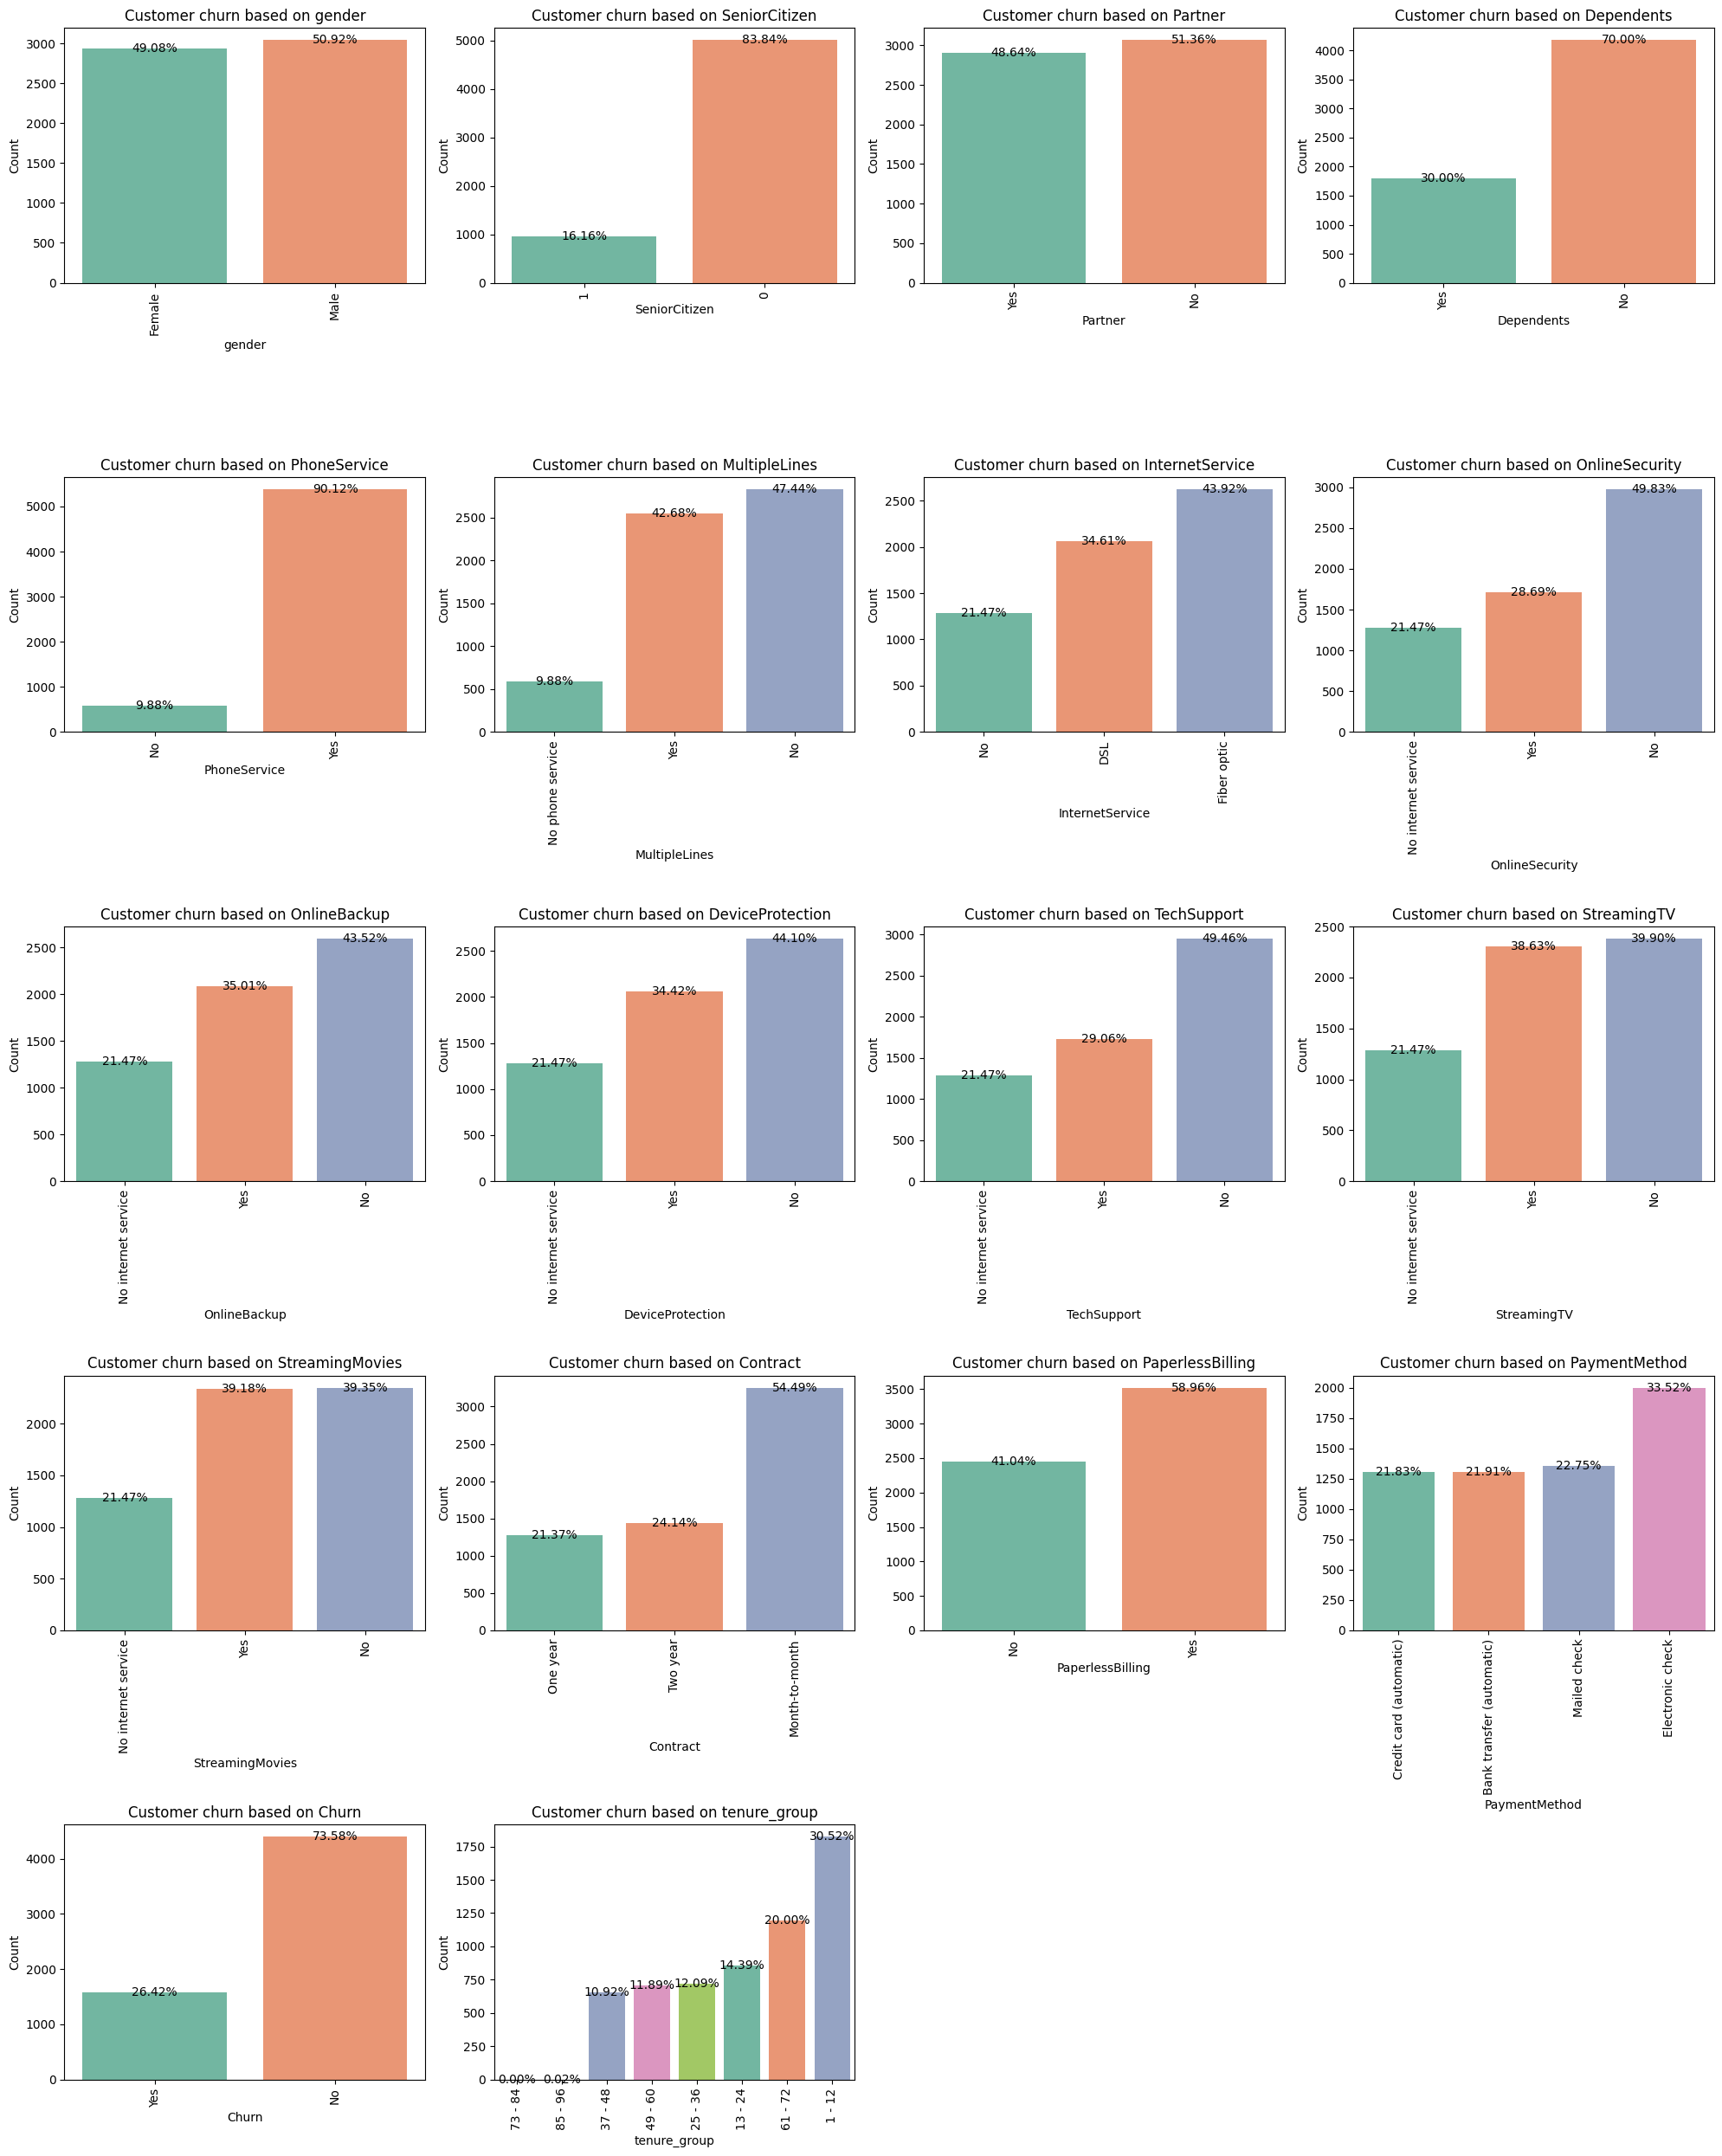

In [25]:
#distribution of feature plot
#plotting count plots for all the categorical columns
color_palette = sns.color_palette("Set2", n_colors=5)
plt.figure(figsize=(20, 25))
# Define the columns for plotting
columns_to_exclude = ['MonthlyCharges', 'TotalCharges']
columns_to_plot = [col for col in df.columns if col not in columns_to_exclude]
#columns_to_plot = ['tenure','Contract','MonthlyCharges','Total_Charges']

for i, column in enumerate(columns_to_plot, start=1):
    ax=plt.subplot(5, 4, i)
    order = df[column].value_counts().index[::-1]
    sns.countplot(data=df, x=column,  order=order, palette=color_palette)
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Customer churn based on {column}')
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()



```
===Interpretation===
1. The male and female customers more or less equally distibuted.
2. upto 83.6 % of the cutomers age is less than 60.
3. The customers may have dependents or may not. only 50-50 chance.
4. 70 % customers does not have a dependents
5. 90% of the customers using mobile service
6. 43.92 % of the customers are using Fiber optic internet service and 34.61%
   customers are using DSL internet service, can't able to provide ineternet service approximately 22% of the customers.
7. nearly 55 % of the cutomers have month to month contract period.
8. compare to other payment methods  cutomers are more used electronic check
   payment method.
9. majority of the customers(30.52%) have 1 year tenure only.
10.nearly 74 % of the customers don't want to churn. But here the datasets are
   completely imbalanced.
```



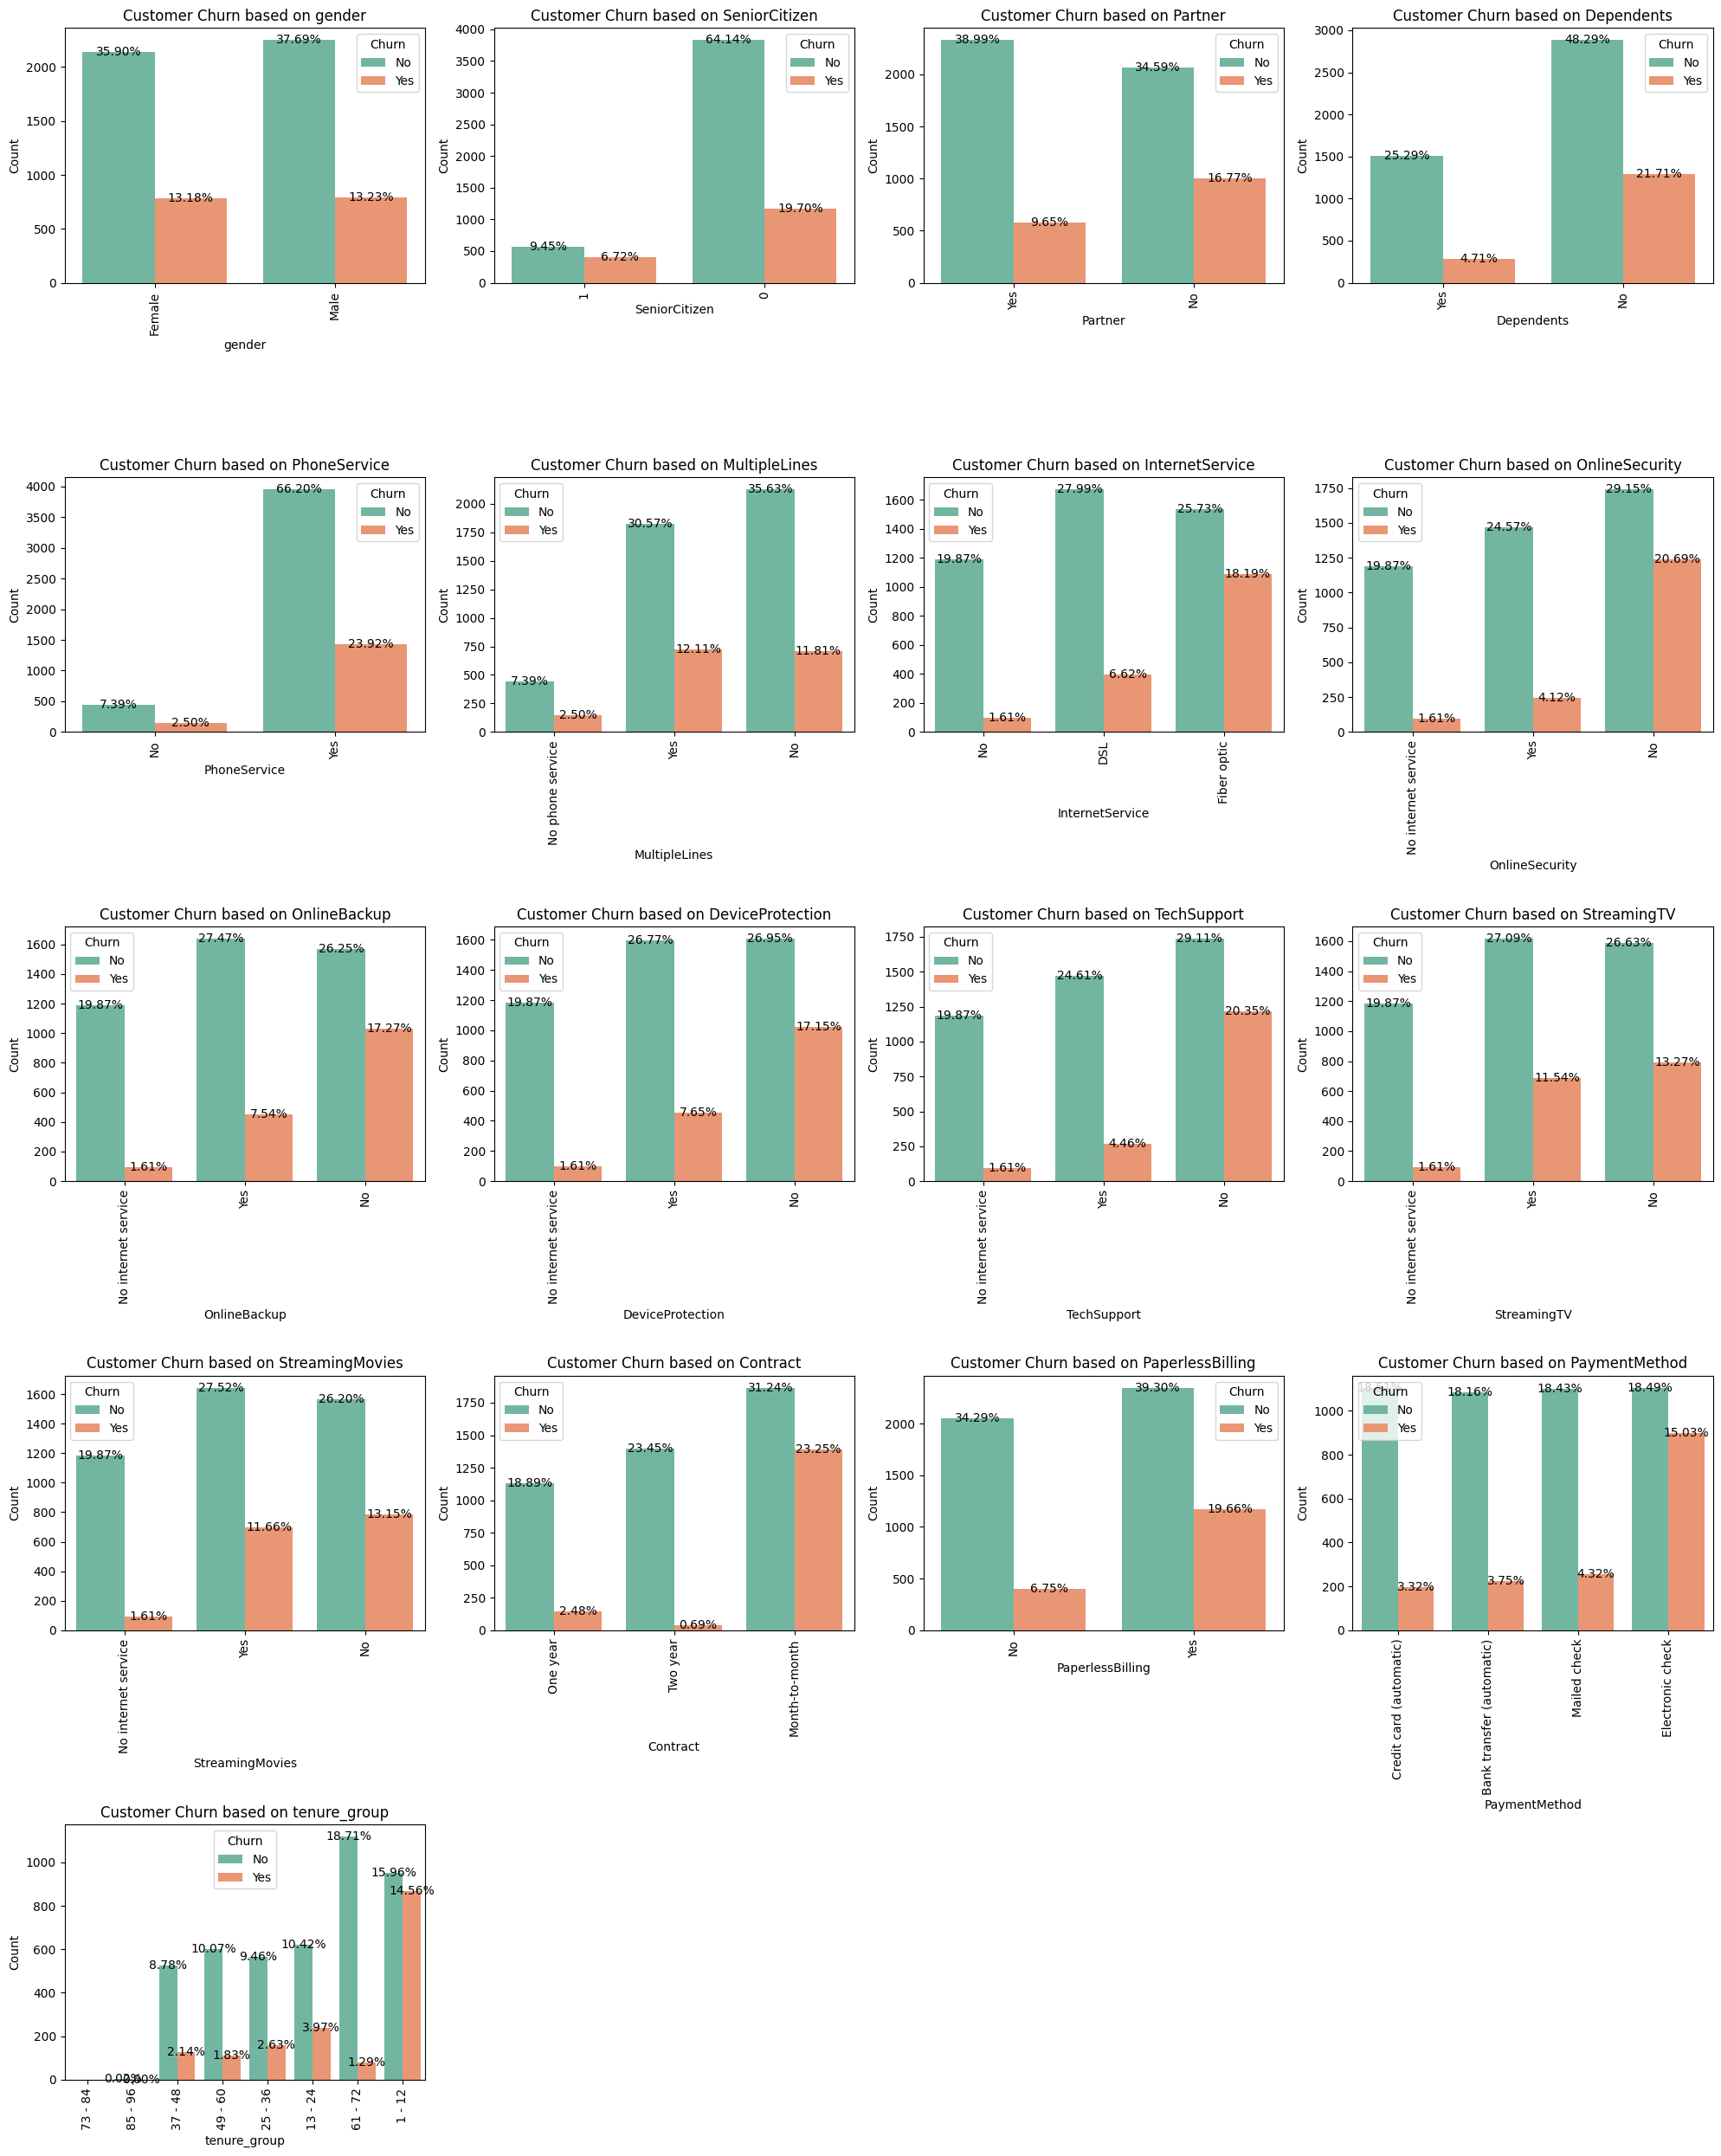

In [26]:
#distribution of feature plot
#plotting count plots for all the categorical columns
color_palette = sns.color_palette("Set2", n_colors=5)
plt.figure(figsize=(20, 25))
# Define the columns for plotting
columns_to_exclude = ['MonthlyCharges', 'TotalCharges','Churn']
columns_to_plot = [col for col in df.columns if col not in columns_to_exclude]

for i, column in enumerate(columns_to_plot, start=1):
    ax=plt.subplot(5, 4, i)
    order = df[column].value_counts().index[::-1]
    sns.countplot(data=df, x=column, hue='Churn', order=order, palette=color_palette)
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Customer Churn based on {column}')
    for p in ax.patches:
      height = p.get_height()
      percentage = (height / total) * 100
      ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()



```
==Interpretation==
1. chances of cutomers churn not changing much with the gender, so age
   is not an important while seeing age column alone with target.
2. senior citizen have higher ratio , so they have high chance to churn
3. majoriy of the unmarried customers are more likely to churn
4. fiber optic internet cutomers are high chance to churn.
5. month to month contract period cutomers are more likely to churn.
6. cutomers those who are paying in elctronic check payment method more
   likely to churn.
7. customer who have only min 1 year contract have high chance to churn.
```



In [27]:
df['Churn'] = df.Churn.map({'Yes':1, 'No':0})



```
converting terget column categorical to numeric by using binary encoding
```



In [28]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0           24.10       1734.65      0              0   
1              0           88.15       3973.20      0              1   
2              1           74.95       2869.85      1              1   
3              0           55.90        238.50      0              0   
4              0           53.45        119.50      0              0   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0            1           0            1              0               1   
1            0           1            0              1               0   
2            0           0            1              1               0   
3            1           1            0              1               0   
4            1           1            0              1               0   

   PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0                0                 1                 0   
1                0                 1                 1   
2                0                 1                 0   
3                0                 1                 1   
4                0                 1                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               0                  1                    0   
1                               0                  0                    0   
2                               0                  1                    0   
3                               0                  0                    1   
4                               0                  0                    1   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                            0                   1                  0   
1                            1                   0                  1   
2                            1                   0                  1   
3                            0                   0                  1   
4                            0                   0                  0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                   1                   0                0   
1                                   0                   0                0   
2                                   0                   0                1   
3                                   0                   0                1   
4                                   0                   1                1   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                                 1                 0                    0   
1                                 0                 1                    0   
2                                 0                 0                    1   
3                                 0                 0                    1   
4                                 0                 0                    0   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                     1                     0               0   
1                                     0                     1               1   
2                                     0                     0               1   
3                                     0                     0               1   
4                                     0                     1               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                1                0               0   
1                                0                0               0   
2                                0                0               1   
3                                0                0               1   
4                                0                0               1   

   StreamingTV_No inte



```
converting all categorical column into dummy variables
```



<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

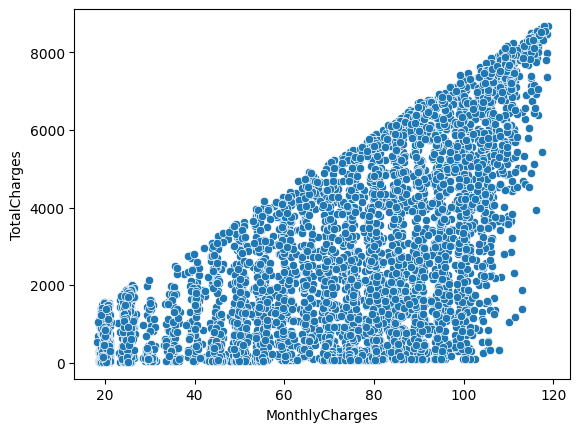

In [29]:
sns.scatterplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges')



```
from the above result monthlycharges have good linear relationship totalcharges
```



<ipython-input-30-3a541a3f6360>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
<ipython-input-30-3a541a3f6360>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

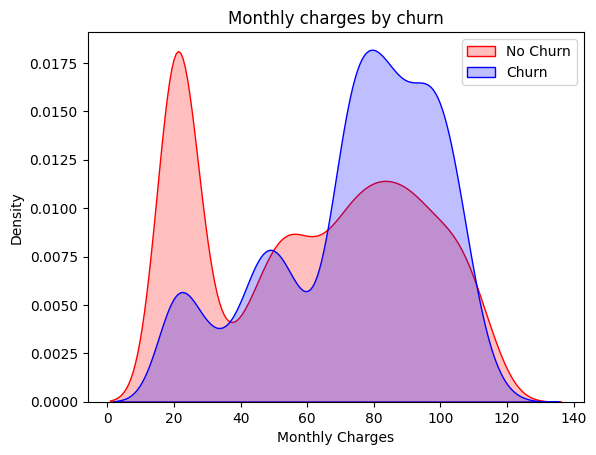

In [30]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')



```
--Insights--
while increasing monthly charges , the chun rate also increasing
```



<ipython-input-31-8cd322328d36>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
<ipython-input-31-8cd322328d36>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

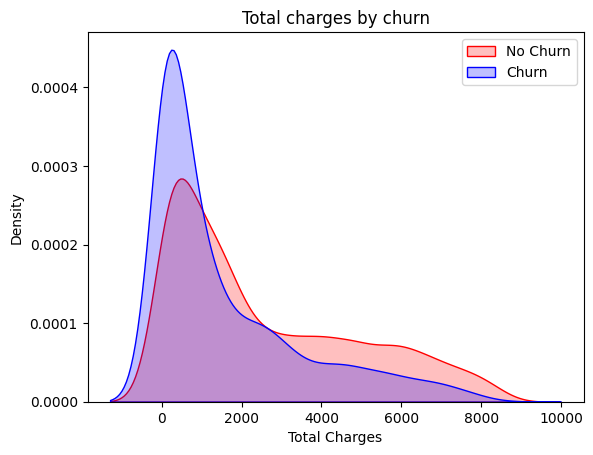

In [31]:
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')



```
--Insights--
when total charge decreases , the churn rate will be increases

```



<Axes: >

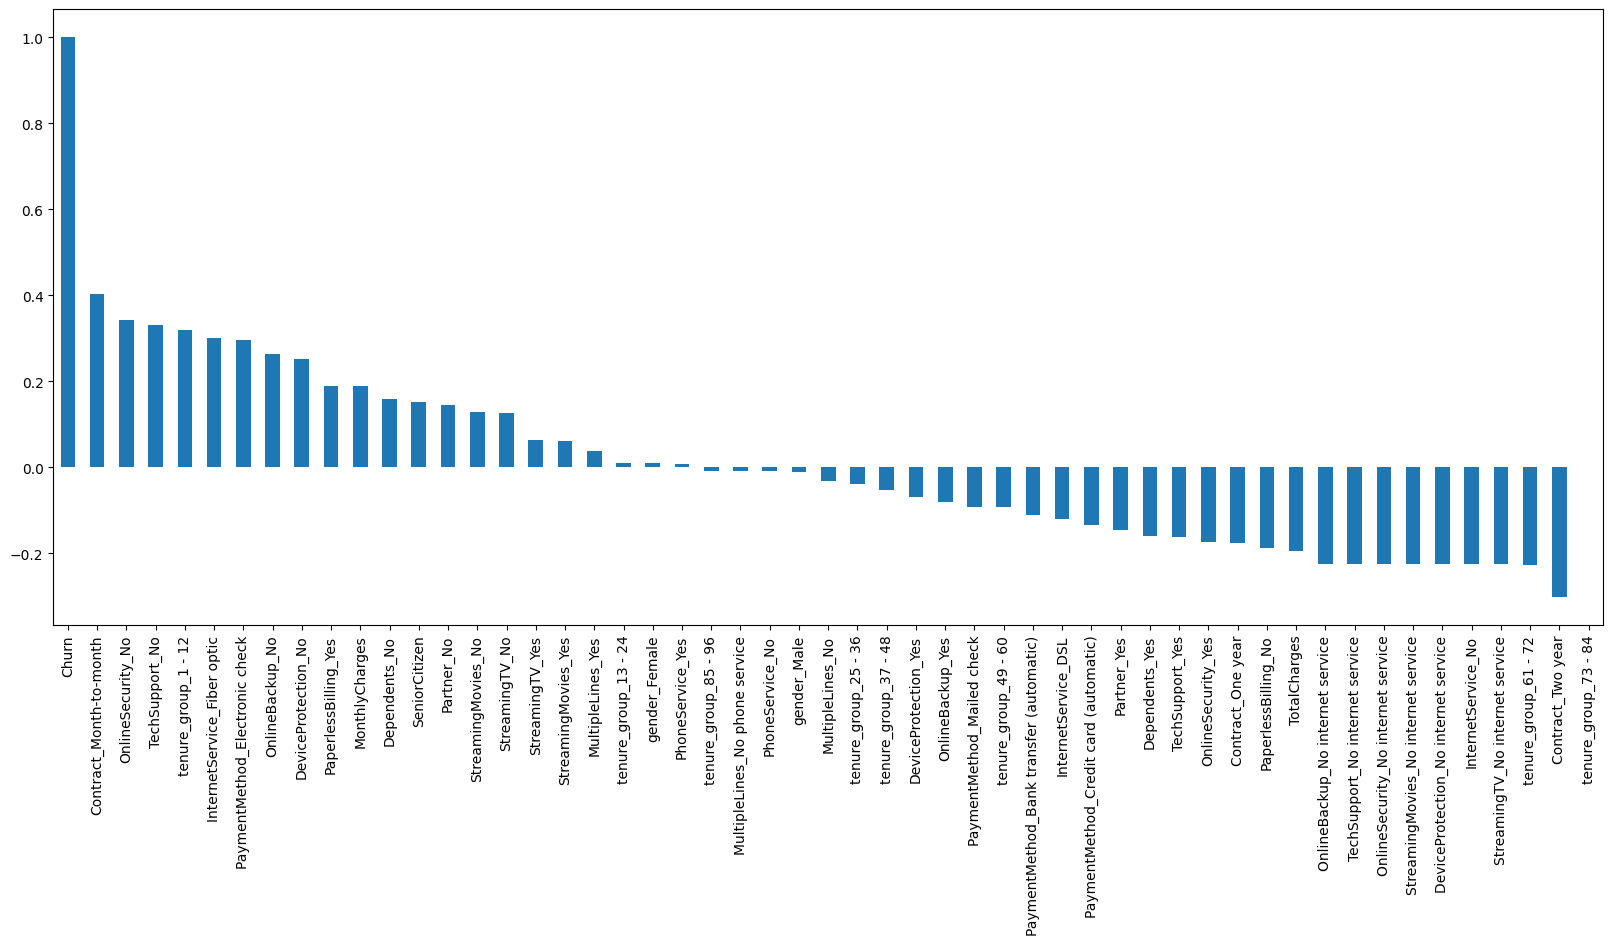

In [32]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')



```
Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn
```



<Axes: >

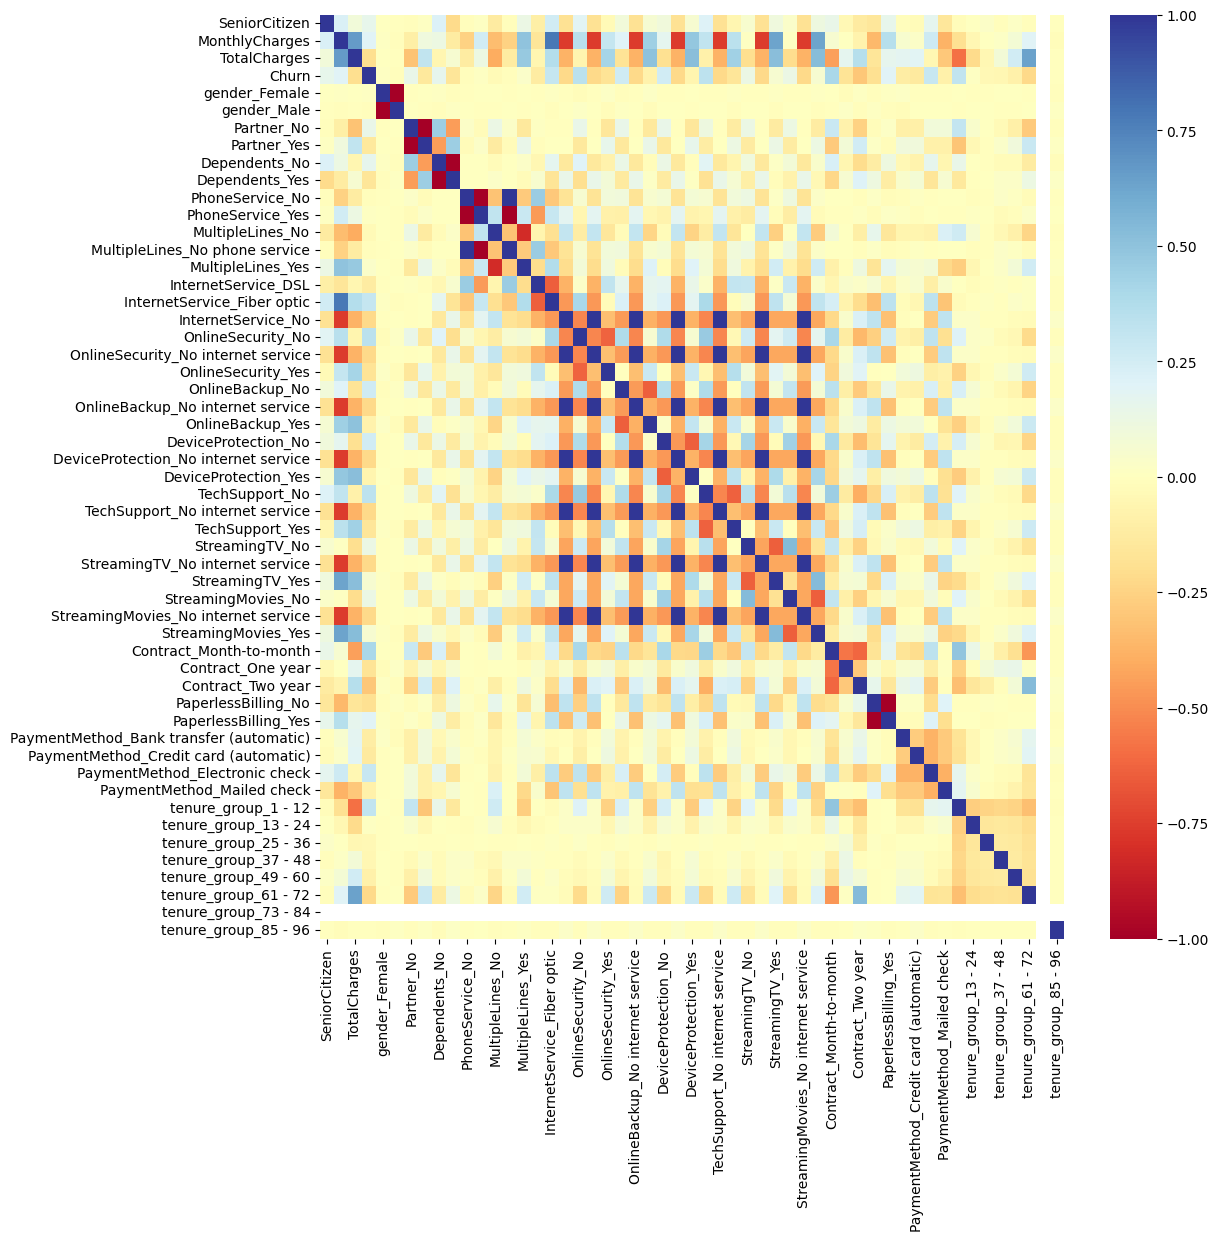

In [33]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_dummies.corr(), cmap="RdYlBu", fmt=".2f")

## **Bivariate Analysis**

In [34]:
df_churn=df.loc[df["Churn"]==1]
df_no_churn=df.loc[df["Churn"]==0]

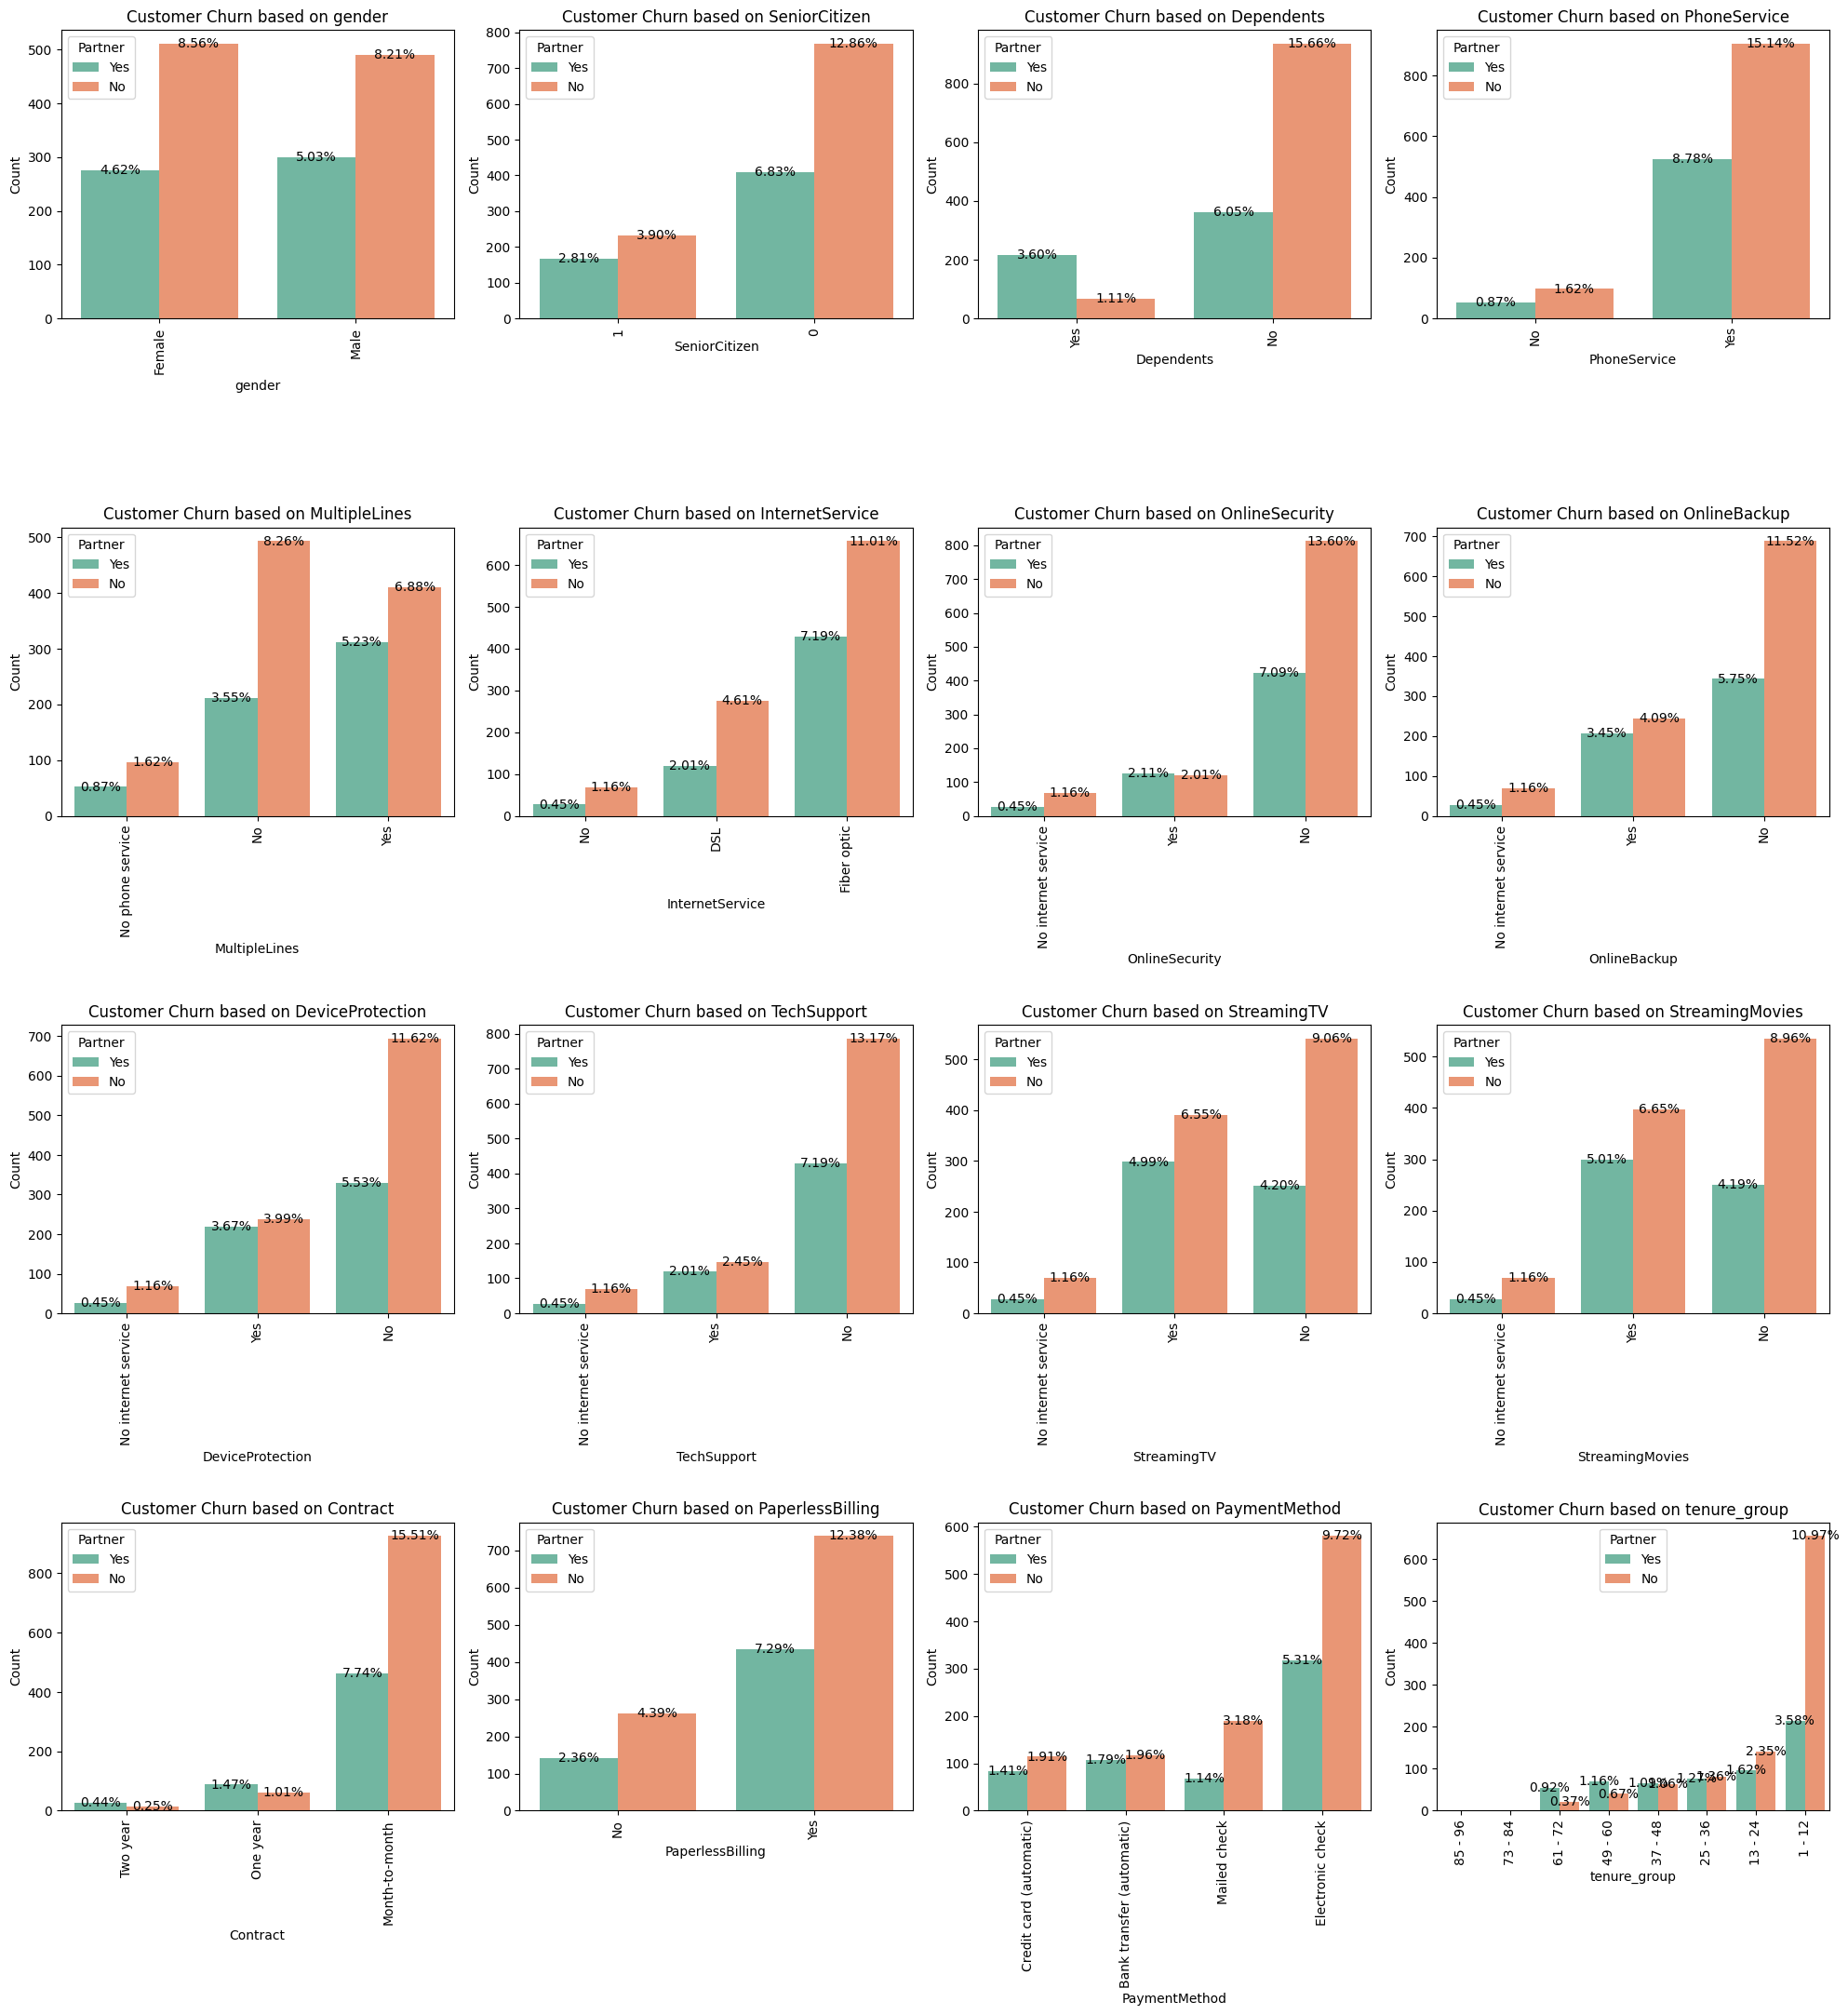

In [35]:
color_palette = sns.color_palette("Set2", n_colors=3)
plt.figure(figsize=(20, 25))
# Define the columns for plotting
columns_to_exclude = ['MonthlyCharges', 'TotalCharges','Churn','Partner']
columns_to_plot = [col for col in df_churn.columns if col not in columns_to_exclude]

for i, column in enumerate(columns_to_plot, start=1):
    ax=plt.subplot(5, 4, i)
    order = df_churn[column].value_counts().index[::-1]
    sns.countplot(data=df_churn, x=column, hue='Partner', order=order, palette=color_palette)
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Customer Churn based on {column}')
    for p in ax.patches:
      height = p.get_height()
      percentage = (height / total) * 100
      ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()



```
--Insights--
From above all combination of plots
In genral if the customer don't have partner ,not a senior citizen, no
dependents,phone serive is yes,InternetService is fiber optic,
No technical support, the paper less billing is yes, elctronic payment method,
they have high chance to churn within one year contract period
```



In [36]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

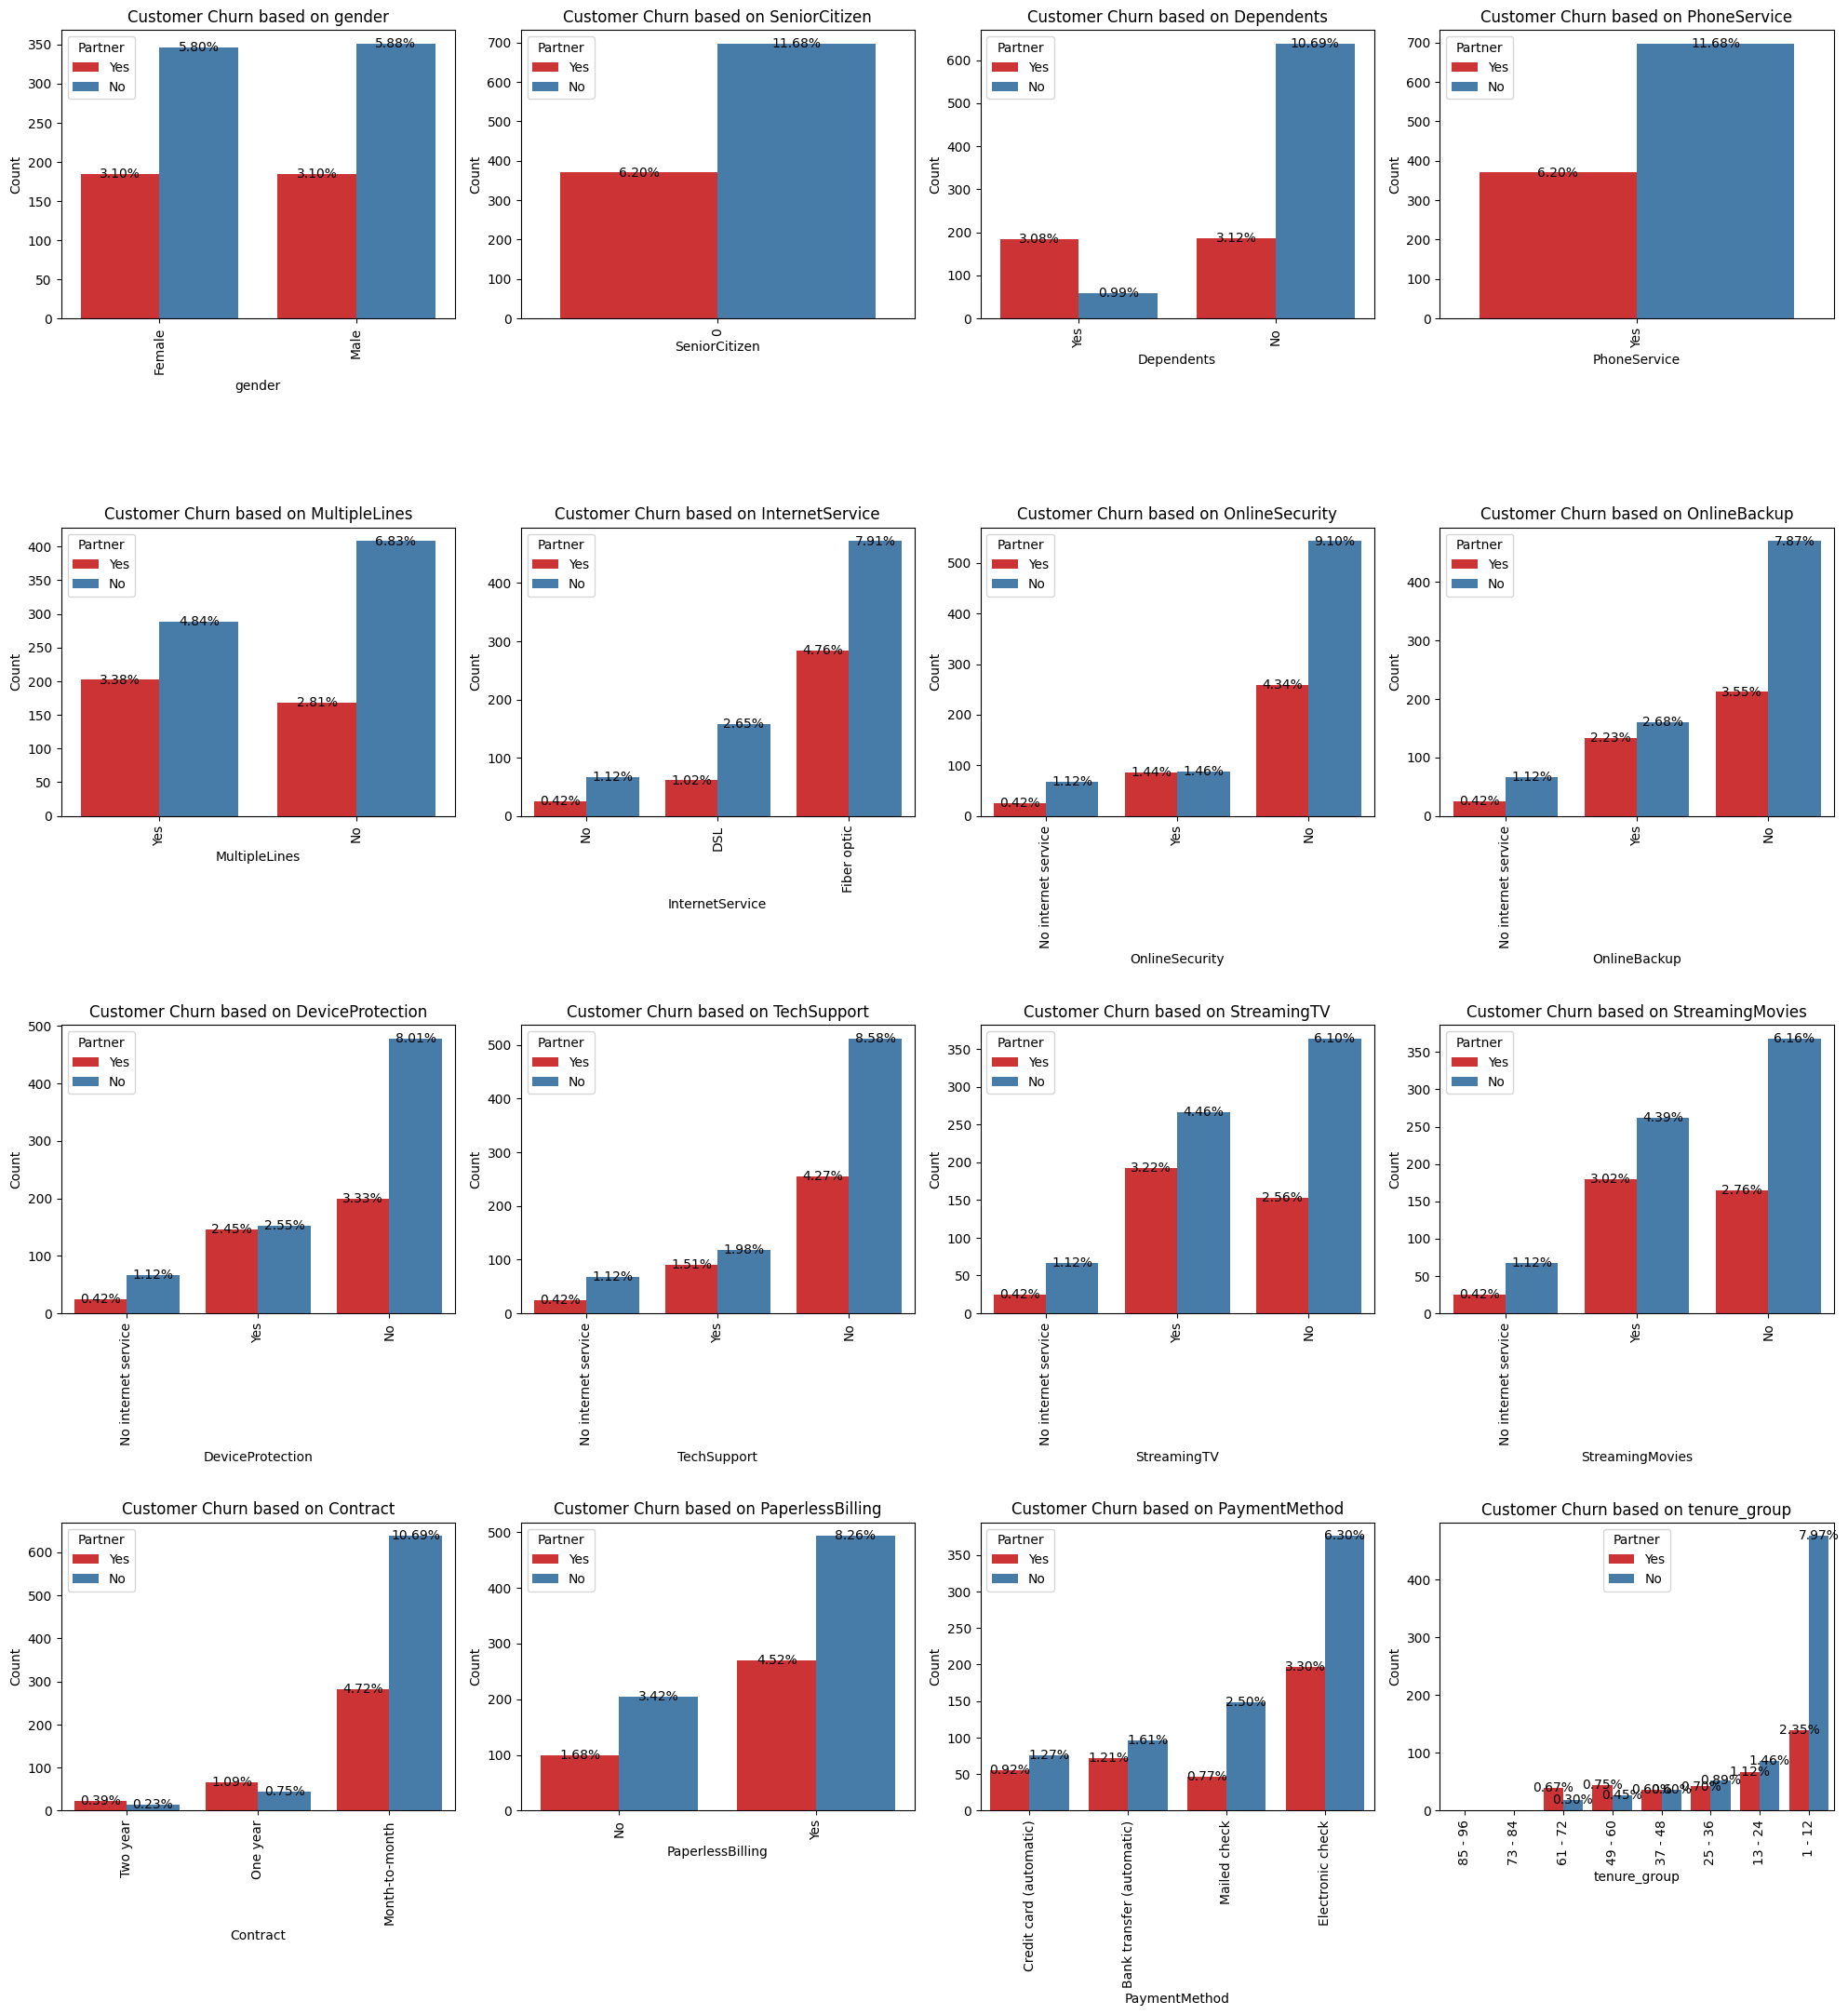

In [37]:
df_churn=df.loc[(df["Churn"]==1) & (df['SeniorCitizen']==0) & (df['PhoneService']=='Yes')]
df_no_churn=df.loc[df["Churn"]==0]

color_palette = sns.color_palette("Set1", n_colors=3)
plt.figure(figsize=(20, 25))
# Define the columns for plotting
columns_to_exclude = ['MonthlyCharges', 'TotalCharges','Churn','Partner']
columns_to_plot = [col for col in df_churn.columns if col not in columns_to_exclude]

for i, column in enumerate(columns_to_plot, start=1):
    ax=plt.subplot(5, 4, i)
    order = df_churn[column].value_counts().index[::-1]
    sns.countplot(data=df_churn, x=column, hue='Partner', order=order, palette=color_palette)
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Customer Churn based on {column}')
    for p in ax.patches:
      height = p.get_height()
      percentage = (height / total) * 100
      ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()



```
--Insights--
from above all plots
Chances of customer churn not changing much with the gender, so gender
is not an important, So we can delete the gender column.
```



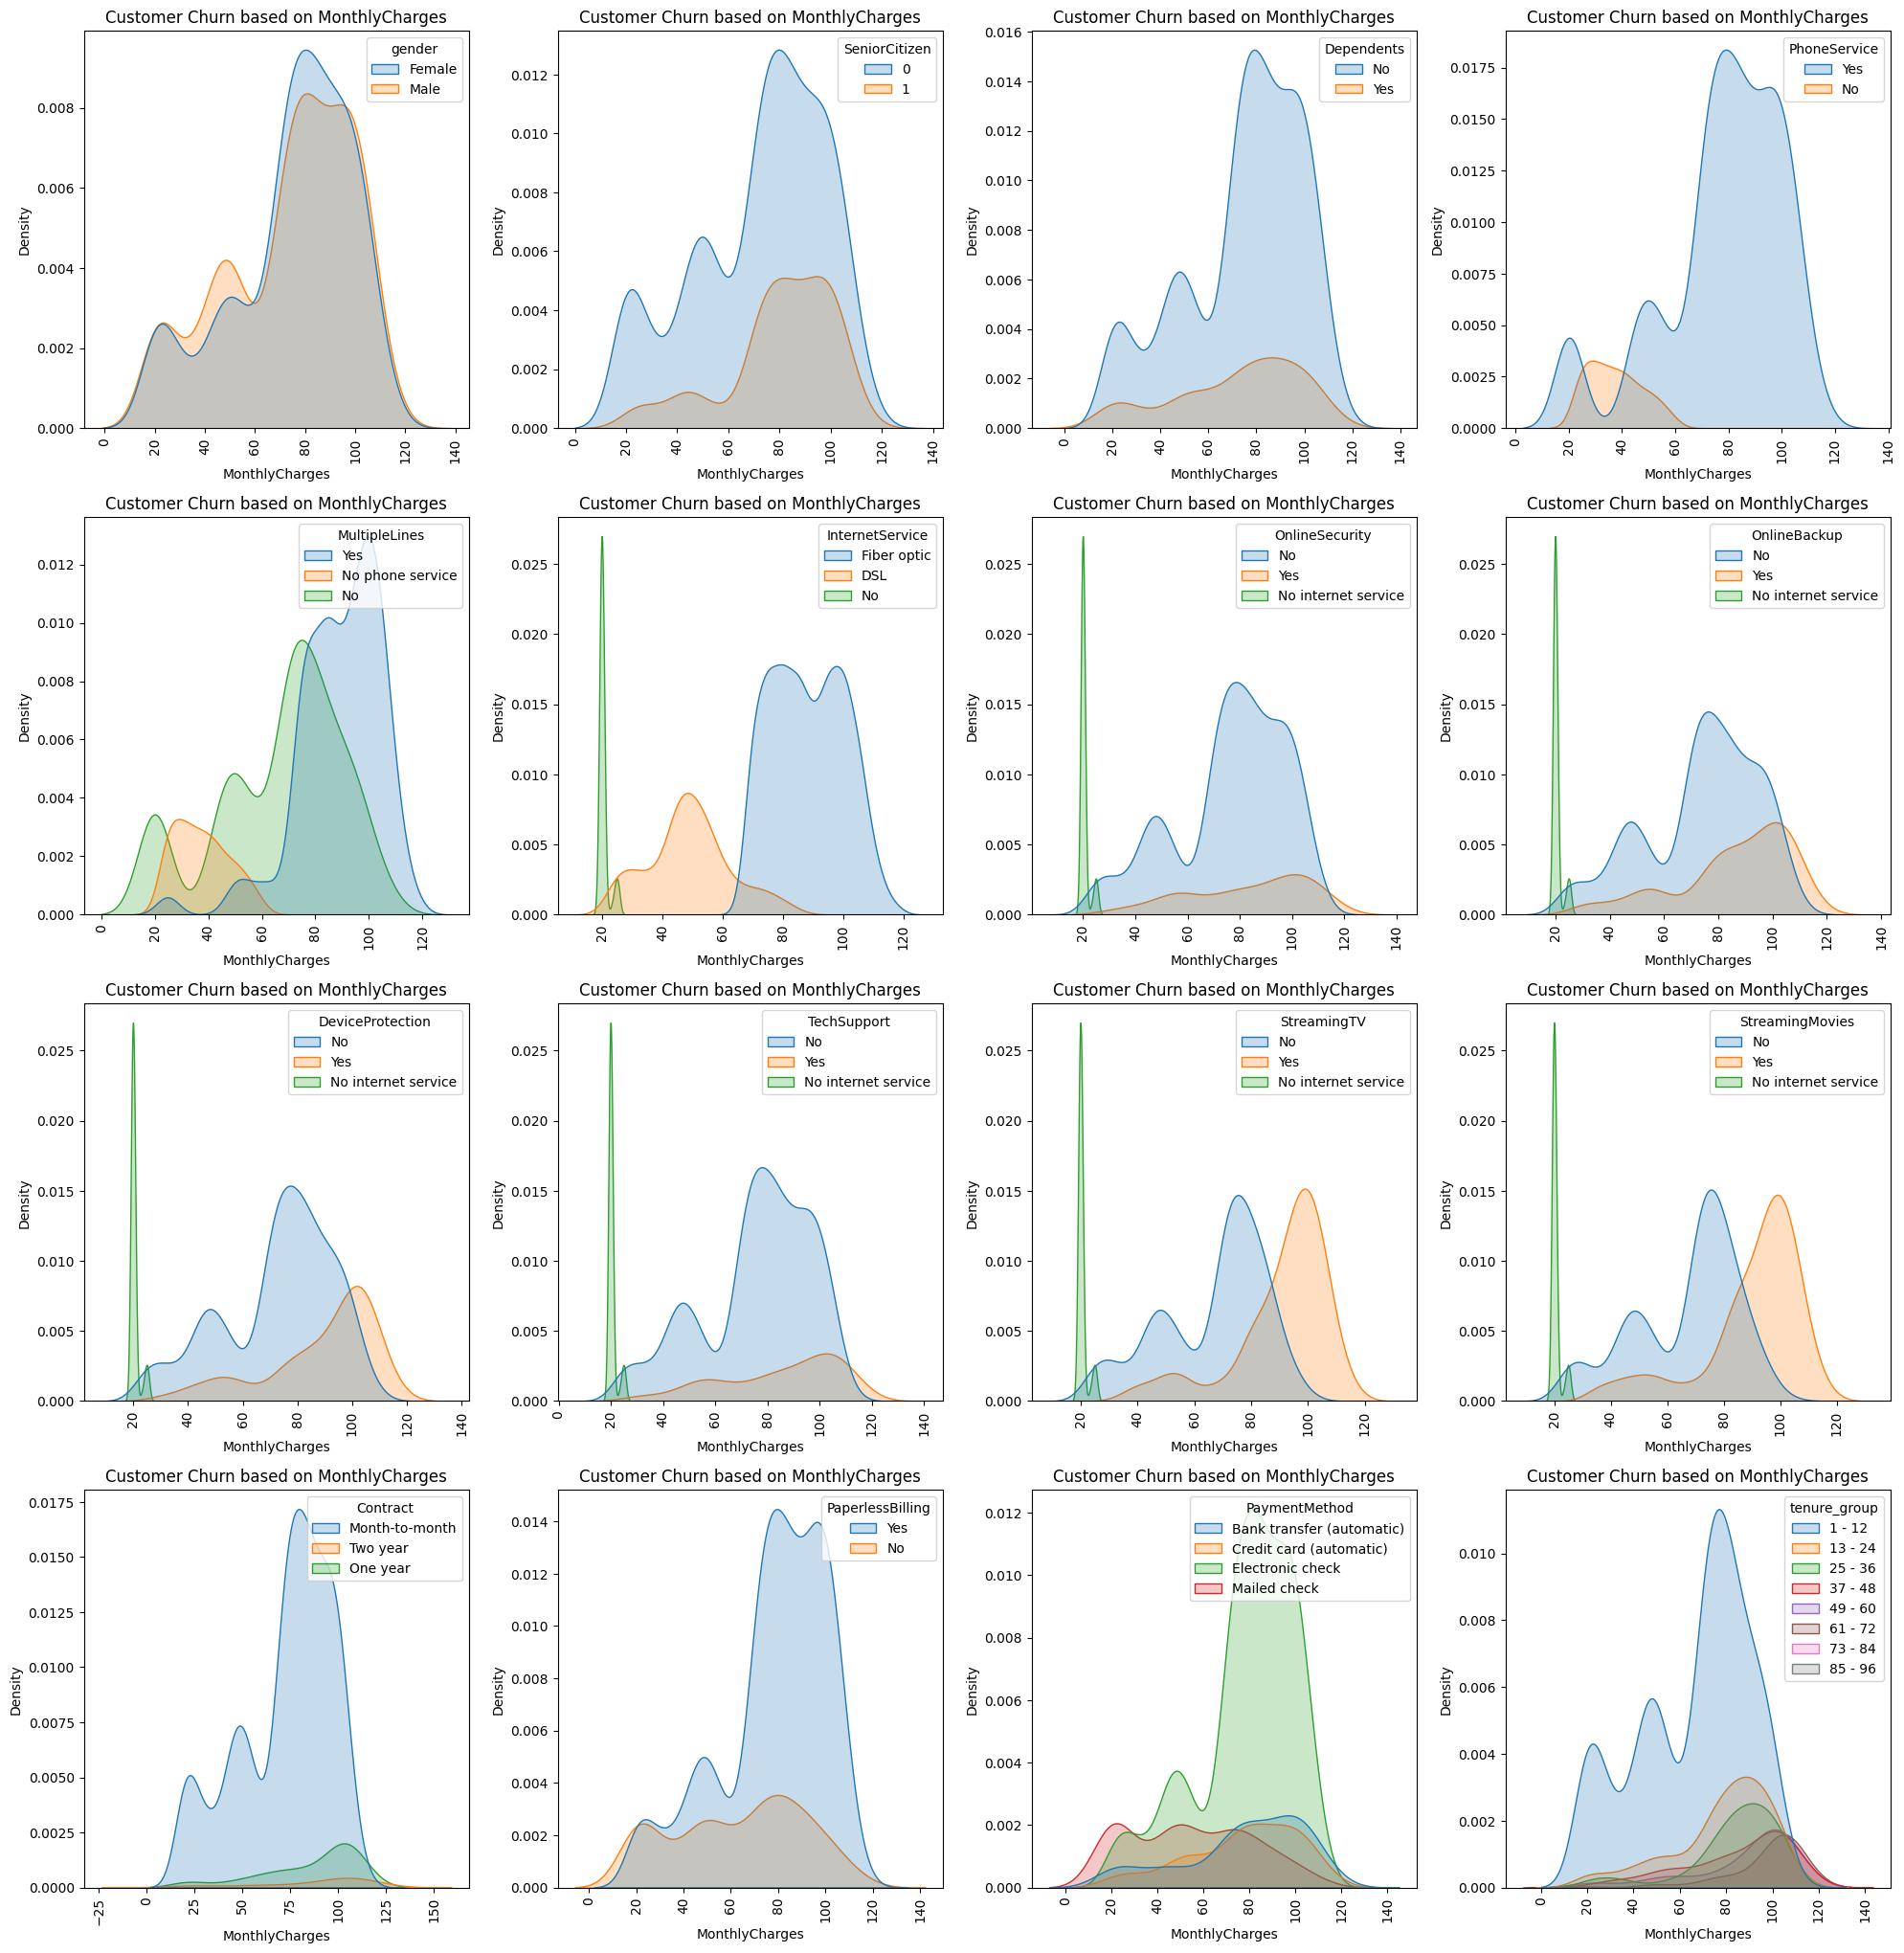

In [38]:
df_churn=df.loc[(df["Churn"]==1) ]
df_no_churn=df.loc[df["Churn"]==0]
plt.figure(figsize=(20, 25))
columns_to_plot = ['MonthlyCharges']
hue_columns_to_exclude = ['MonthlyCharges', 'TotalCharges','Churn']
hue_columns_to_plot = [col for col in df_churn.columns if col not in columns_to_exclude]

for  column in (columns_to_plot):
  for i, hue_column in enumerate(hue_columns_to_plot, start=1):
      ax=plt.subplot(5, 4, i)
      order = df_churn[column].value_counts().index[::-1]
      sns.kdeplot(data=df_churn, x=column, hue=hue_column,color='Red', fill=True)
      plt.xticks(rotation=90)
      plt.xlabel(column)
      plt.ylabel('Density')
      plt.title(f'Customer Churn based on {column}')

  plt.tight_layout()
  plt.show()


# Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
#                 color="Red", shade = True)
# Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],
#                 ax =Tot, color="Blue", shade= True)
# Tot.legend(["No Churn","Churn"],loc='upper right')
# Tot.set_ylabel('Density')
# Tot.set_xlabel('Total Charges')
# Tot.set_title('Total charges by churn')

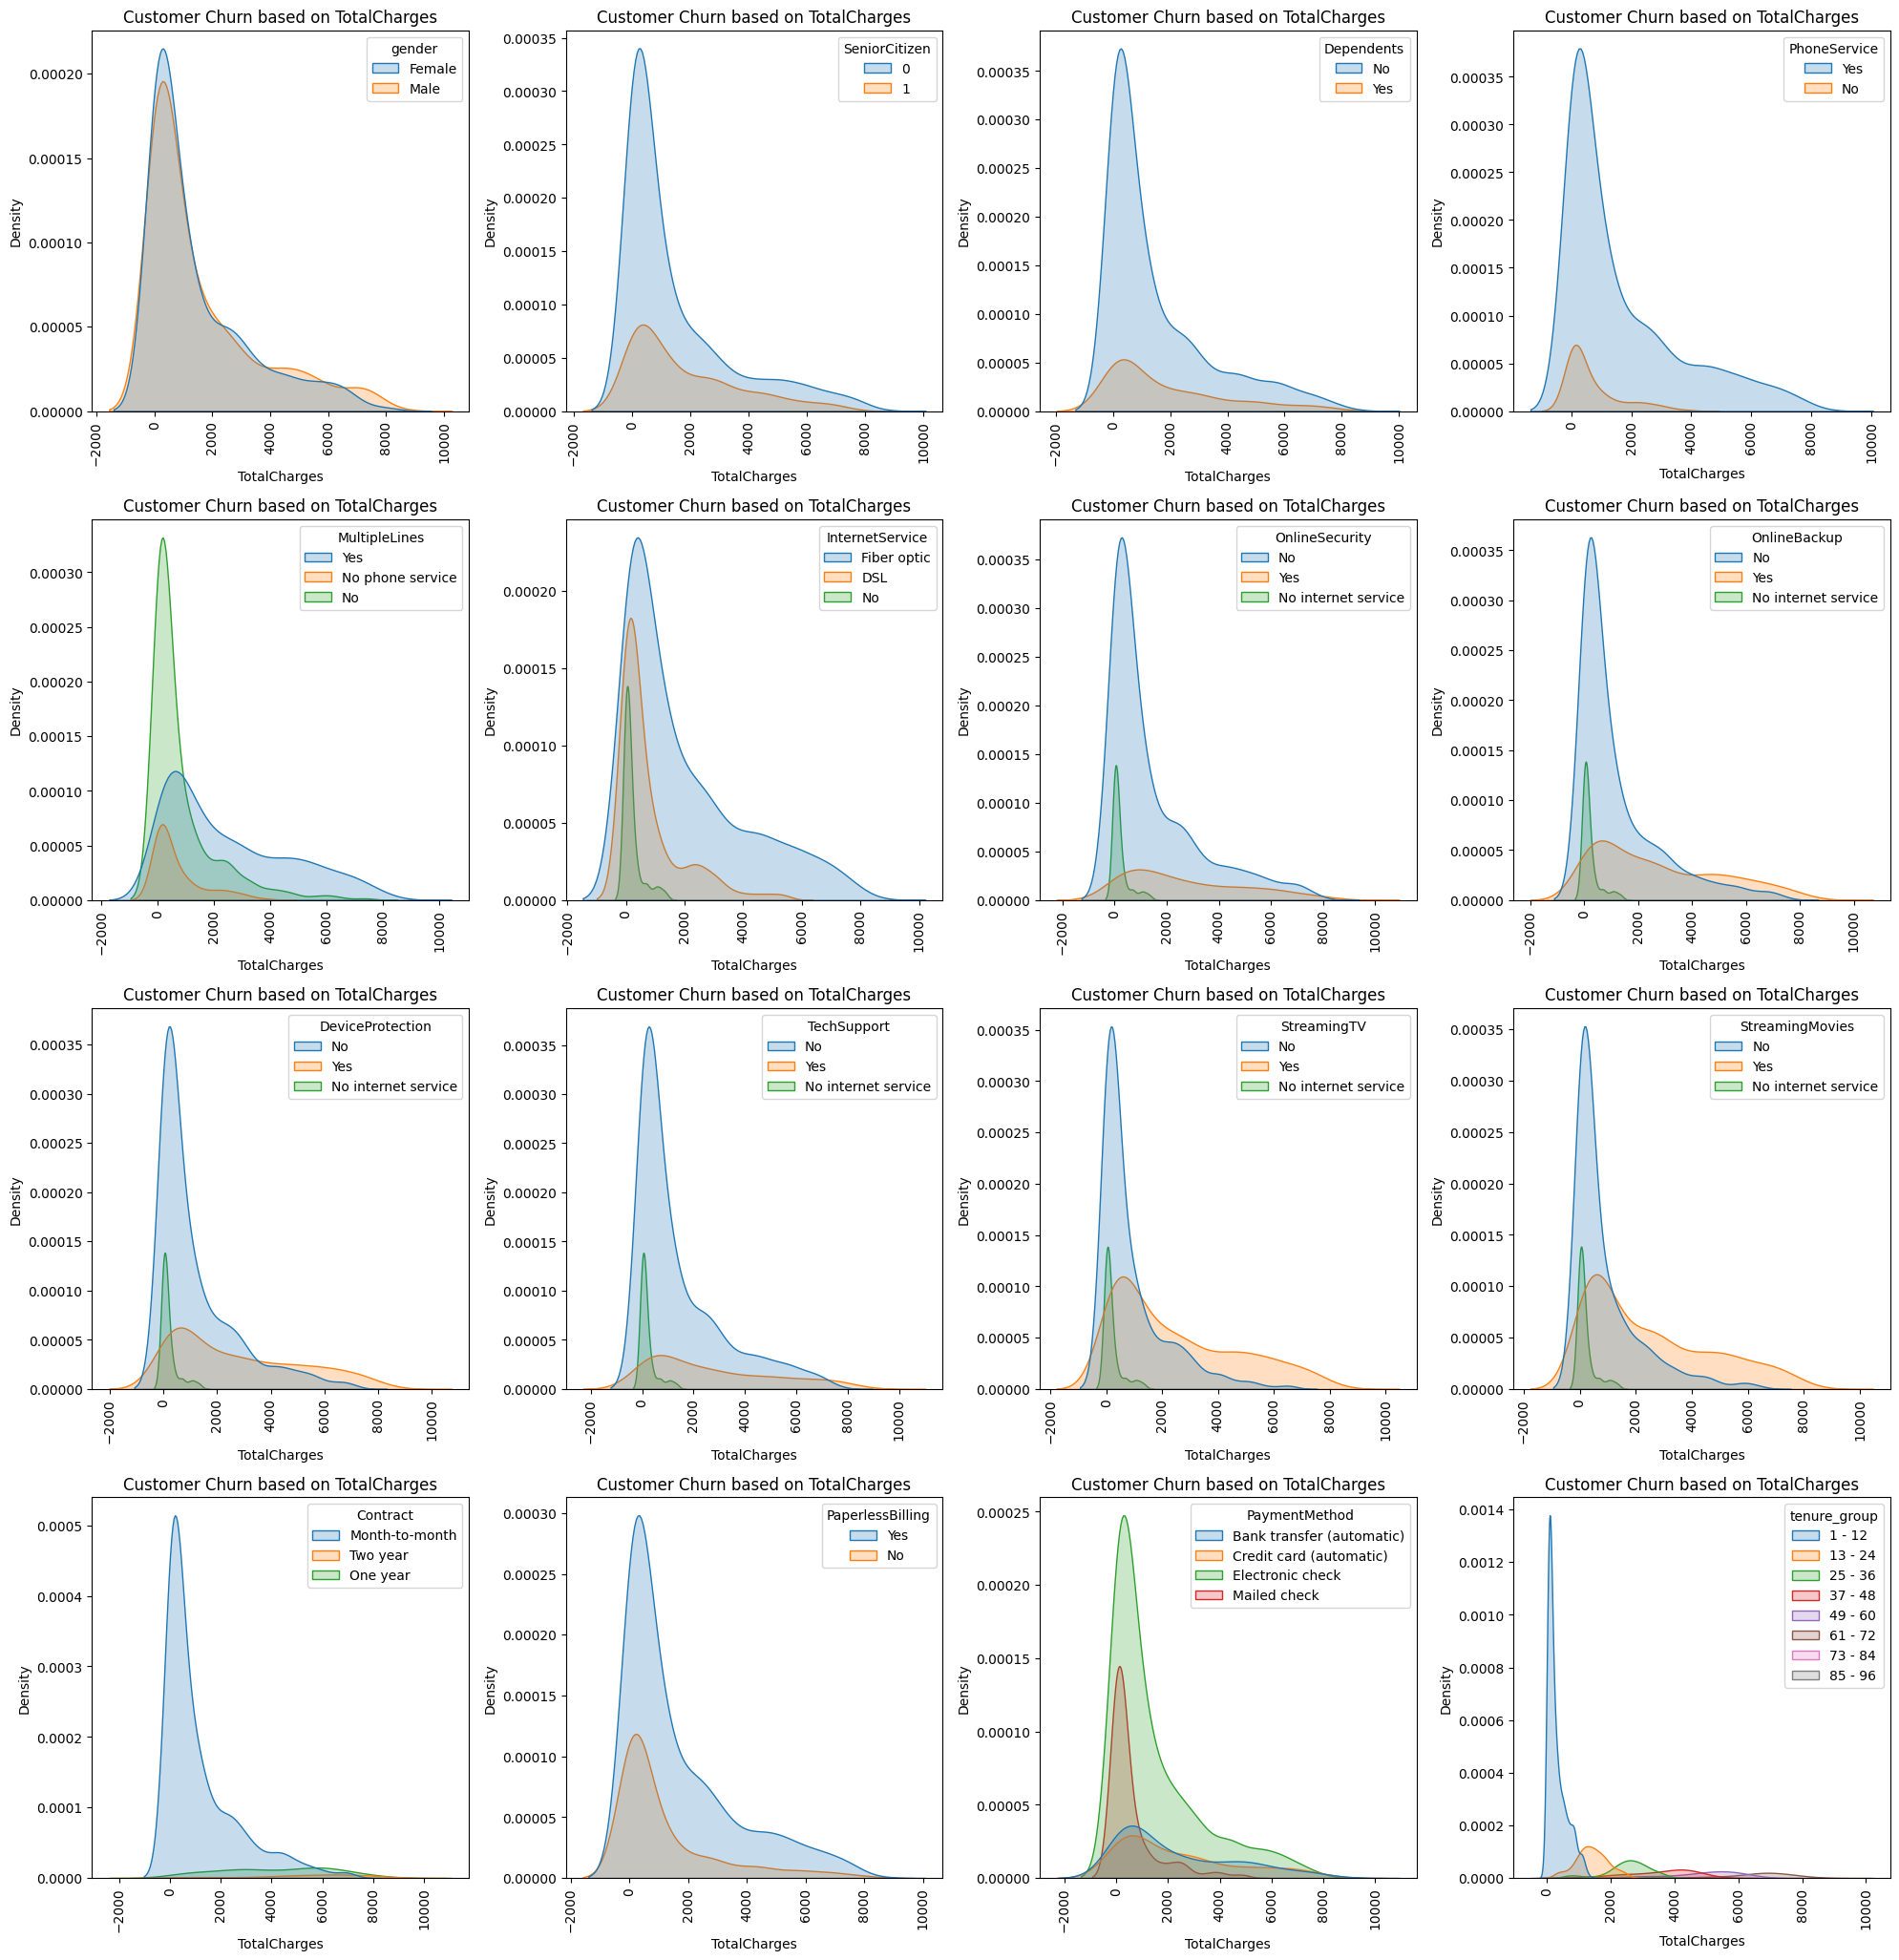

In [39]:
df_churn=df.loc[(df["Churn"]==1) ]
df_no_churn=df.loc[df["Churn"]==0]
plt.figure(figsize=(20, 25))
columns_to_plot = [ 'TotalCharges']
hue_columns_to_exclude = ['MonthlyCharges', 'TotalCharges','Churn']
hue_columns_to_plot = [col for col in df_churn.columns if col not in columns_to_exclude]

for  column in (columns_to_plot):
  for i, hue_column in enumerate(hue_columns_to_plot, start=1):
      ax=plt.subplot(5, 4, i)
      order = df_churn[column].value_counts().index[::-1]
      sns.kdeplot(data=df_churn, x=column, hue=hue_column,color='Red', fill=True)
      plt.xticks(rotation=90)
      plt.xlabel(column)
      plt.ylabel('Density')
      plt.title(f'Customer Churn based on {column}')

  plt.tight_layout()
  plt.show()

In [40]:
df_dummies.drop(['gender_Female','gender_Male'],axis=1,inplace=True)
df_dummies.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  Partner_No  \
0              0           24.10       1734.65      0           0   
1              0           88.15       3973.20      0           1   
2              1           74.95       2869.85      1           0   
3              0           55.90        238.50      0           1   
4              0           53.45        119.50      0           1   

   Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0            1              0               1                0   
1            0              1               0                0   
2            1              1               0                0   
3            0              1               0                0   
4            0              1               0                0   

   PhoneService_Yes  MultipleLines_No  MultipleLines_No phone service  \
0                 1                 0                               0   
1                 1                 1                               0   
2                 1                 0                               0   
3                 1                 1                               0   
4                 1                 1                               0   

   MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  \
0                  1                    0                            0   
1                  0                    0                            1   
2                  1                    0                            1   
3                  0                    1                            0   
4                  0                    1                            0   

   InternetService_No  OnlineSecurity_No  OnlineSecurity_No internet service  \
0                   1                  0                                   1   
1                   0                  1                                   0   
2                   0                  1                                   0   
3                   0                  1                                   0   
4                   0                  0                                   0   

   OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  \
0                   0                0                                 1   
1                   0                0                                 0   
2                   0                1                                 0   
3                   0                1                                 0   
4                   1                1                                 0   

   OnlineBackup_Yes  DeviceProtection_No  \
0                 0                    0   
1                 1                    0   
2                 0                    1   
3                 0                    1   
4                 0                    0   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                     1                     0               0   
1                                     0                     1               1   
2                                     0                     0               1   
3                                     0                     0               1   
4                                     0                     1               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                1                0               0   
1                                0                0               0   
2                                0                0               1   
3                                0                0               1   
4                                0                0               1   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                                1                0                   0   
1                                0      

In [41]:
x=df_dummies.drop(columns='Churn').values
for i in x[0][:19]:
  print(i)


0.0
24.1
1734.65
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0


## **spliting**

In [42]:
from sklearn.model_selection import train_test_split
x=df_dummies.drop(columns='Churn').values
y=df_dummies.Churn.values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
y

array([0, 0, 1, ..., 0, 1, 0])

## **balanced Data ?**

In [44]:
pd.Series(y_train).value_counts() / pd.Series(y_train).shape[0]

0    0.738693
1    0.261307
dtype: float64

In [45]:
from imblearn.combine import SMOTEENN #import the SMOTEENN
smt = SMOTEENN(sampling_strategy = 'all') #initialize the SMOTEENN
x_train, y_train = smt.fit_resample(x_train, y_train)

In [46]:
pd.Series(y_train).value_counts() / pd.Series(y_train).shape[0]

1    0.534143
0    0.465857
dtype: float64

## **Scaling**

In [47]:
from sklearn.preprocessing import StandardScaler #import StandardScaler funtion
scaler =StandardScaler() #Initialize StandardScaler funtion
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Model Building**
Labled data-Supervised learning-binary classification-so we can use logistic regression, knn, decision tree, random forest, xg boost

## **1. Logistic Regression**

In [104]:
from sklearn.linear_model import LogisticRegression #import the LogisticRegression
from sklearn.model_selection import cross_val_score
LR = LogisticRegression()  #initialize the LogisticRegression
LR.fit(x_train_scaled,y_train)

LogisticRegression()

In [105]:
cross_val_LR = cross_val_score(LR,x_train_scaled,y_train,cv=10).mean()
cross_val_LR

0.9092927081432828

In [106]:
y_pred = LR.predict(x_test)

## **2.K Nearest Neighbor Classification**

### **2.1 Choosing the best value of K**

In [107]:
from sklearn.neighbors import KNeighborsClassifier #import the KNeighborsClassifier

for k in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
    knn_classifier = KNeighborsClassifier(k) #initialize the KNeighborsClassifier
    knn_classifier.fit(x_train_scaled,y_train)
    print('k value :', k, 'training_score :', knn_classifier.score(x_train_scaled,y_train), 'cv_score :', cross_val_score(knn_classifier,x_train_scaled,y_train,cv=10).mean())

k value : 1 training_score : 1.0 cv_score : 0.9255677187861096
k value : 2 training_score : 0.990633473009613 cv_score : 0.927049200267591
k value : 3 training_score : 0.9509489770766576 cv_score : 0.9120081493644714
k value : 4 training_score : 0.9531673650480651 cv_score : 0.9206355287964483
k value : 5 training_score : 0.9324624106482623 cv_score : 0.907813659307912
k value : 6 training_score : 0.9403500123243776 cv_score : 0.9112680167852583
k value : 7 training_score : 0.9216169583436037 cv_score : 0.9001702852277564
k value : 8 training_score : 0.9275326596006902 cv_score : 0.9046110807030348
k value : 9 training_score : 0.9122504313532167 cv_score : 0.895736179529283
k value : 10 training_score : 0.918905595267439 cv_score : 0.8964750957854406
k value : 20 training_score : 0.8954892777914716 cv_score : 0.8843970078452837
k value : 30 training_score : 0.8839043628296771 cv_score : 0.8767578908958219
k value : 40 training_score : 0.878974611782105 cv_score : 0.8730590524843398
k v

## **2.2 Implementing K Nearest Neighbor Classification**

In [108]:
knn_classifier = KNeighborsClassifier(2) #initialize the KNeighborsClassifier
knn_classifier.fit(x_train_scaled,y_train)
print('k value :', 1, 'training_score :', knn_classifier.score(x_train_scaled,y_train), 'cv_score :', cross_val_score(knn_classifier,x_train_scaled,y_train,cv=10).mean())

k value : 1 training_score : 0.990633473009613 cv_score : 0.927049200267591


In [109]:
cross_val_knn_classifier=cross_val_score(knn_classifier,x_train_scaled,y_train,cv=10).mean()
cross_val_knn_classifier

0.927049200267591

## **3. Decision Tree**

### **3.1 Choosing the best of depth Value**

In [110]:
from sklearn.tree import DecisionTreeClassifier #import the decisiontreeclassifier

for depth in [1,2,3,4,5,6,7,8,9,10,20,26,27,28,29,30,31,32,33,34,35,40,50,51]:
  dt_classifier = DecisionTreeClassifier(max_depth=depth)
  dt_classifier.fit(x_train_scaled,y_train)
  print('k value :', depth, 'Training_Accuracy :', dt_classifier.score(x_train_scaled,y_train), 'cv_score :', cross_val_score (dt_classifier,x_train_scaled,y_train,cv=10).mean())

k value : 1 Training_Accuracy : 0.8617204831156027 cv_score : 0.8612345679012346
k value : 2 Training_Accuracy : 0.8878481636677348 cv_score : 0.8871258286200815
k value : 3 Training_Accuracy : 0.9018979541533153 cv_score : 0.898219911208417
k value : 4 Training_Accuracy : 0.9255607591816614 cv_score : 0.9221261327008454
k value : 5 Training_Accuracy : 0.9408429874291349 cv_score : 0.930012163230554
k value : 6 Training_Accuracy : 0.9526743899433079 cv_score : 0.9391303290153864
k value : 7 Training_Accuracy : 0.963766329800345 cv_score : 0.9376500638569605
k value : 8 Training_Accuracy : 0.9704214937145674 cv_score : 0.9396229398528251
k value : 9 Training_Accuracy : 0.9807739709144688 cv_score : 0.938392629082284
k value : 10 Training_Accuracy : 0.9869361597239339 cv_score : 0.9371568448579943
k value : 20 Training_Accuracy : 1.0 cv_score : 0.933957915222283
k value : 26 Training_Accuracy : 1.0 cv_score : 0.9344499178981938
k value : 27 Training_Accuracy : 1.0 cv_score : 0.9337122179

### **3.2 Implementing Decision Tree Classifier**

In [111]:
dt_classifier = DecisionTreeClassifier(max_depth=7)
dt_classifier.fit(x_train_scaled,y_train)
print('k value :', 7, 'Training_Accuracy :', dt_classifier.score(x_train_scaled,y_train), 'cv_score :', cross_val_score (dt_classifier,x_train_scaled,y_train,cv=10).mean())

k value : 7 Training_Accuracy : 0.963766329800345 cv_score : 0.9383901964361735


In [112]:
cross_val_dt_classifier= cross_val_score (dt_classifier,x_train_scaled,y_train,cv=10).mean()
cross_val_dt_classifier

0.937157453019522

## **4.Voting Classifier**

In [113]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score,accuracy_score
model = VotingClassifier(estimators = [('logistic_regression', LR),('k-nn', knn_classifier),('decision-tree', dt_classifier)])
model.fit(x_train_scaled, y_train)
f'Test data accuracy is : {model.score(x_test_scaled, y_test)}, {f1_score(y_test, model.predict(x_test_scaled))}'

'Test data accuracy is : 0.7211055276381909, 0.6096131301289566'

## **5.Random Forest Classifier**

### **5.1 Choosing the best depth value**

In [114]:
from sklearn.ensemble import RandomForestClassifier

for depth in [1,2,3,4,5,6,7,8,9,10,12,15,20,30,40,50]:
  rf = RandomForestClassifier(max_depth = depth)
  rf.fit(x_train_scaled, y_train)
  train_score = rf.score(x_train_scaled, y_train)
  cross_val_result = np.mean(cross_val_score(rf, x_train_scaled, y_train, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.890806014296278 and cross-val score : 0.882677735206471
Depth : 2, training score : 0.8986936159723934 and cross-val score : 0.8989503132031867
Depth : 3, training score : 0.9117574562484595 and cross-val score : 0.9060986437997931
Depth : 4, training score : 0.9191520828198176 and cross-val score : 0.9171896855804903
Depth : 5, training score : 0.9445403007148139 and cross-val score : 0.9292714224898132
Depth : 6, training score : 0.9524279023909292 and cross-val score : 0.941103205011251
Depth : 7, training score : 0.961301454276559 and cross-val score : 0.9470212248373168
Depth : 8, training score : 0.9701750061621888 and cross-val score : 0.9507176306026881
Depth : 9, training score : 0.9748582696573823 and cross-val score : 0.951949765857812
Depth : 10, training score : 0.9839783090953906 and cross-val score : 0.9529374201787995
Depth : 12, training score : 0.994330786295292 and cross-val score : 0.9539220336921487
Depth : 15, training score : 0.99876

### **5.2 Implementing Random Forest Regression**

In [115]:
rf = RandomForestClassifier(max_depth = 40)
rf.fit(x_train_scaled, y_train)
f'Test data accuracy is : {rf.score(x_test_scaled, y_test)}, {f1_score(y_test, rf.predict(x_test_scaled))}'

'Test data accuracy is : 0.7546063651591289, 0.6169934640522876'

In [116]:
cross_val_rf_classifier = np.mean(cross_val_score(rf, x_train_scaled, y_train, cv = 10))

## **6.Extreme Gradient Boosting Classifier**

### **6.1 Choosing the best Learning Rate**

In [117]:
import xgboost as xgb
for lr in [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.5, 1]:
  xg = xgb.XGBClassifier(learning_rate=lr)
  xg.fit(x_train_scaled, y_train)
  train_score = xg.score(x_train_scaled, y_train)
  cross_val_result = np.mean(cross_val_score(xg, x_train_scaled, y_train, cv = 10))
  print(f'Learning Rate : {lr}, training score : {train_score} and cross-val score : {cross_val_result}')

Learning Rate : 0.001, training score : 0.8858762632487059 and cross-val score : 0.8797159885665632
Learning Rate : 0.002, training score : 0.9479911264481143 and cross-val score : 0.928778811652375
Learning Rate : 0.005, training score : 0.9524279023909292 and cross-val score : 0.9364264428632243
Learning Rate : 0.01, training score : 0.9568646783337441 and cross-val score : 0.9408593322386427
Learning Rate : 0.02, training score : 0.9674636430860242 and cross-val score : 0.9484990573496322
Learning Rate : 0.03, training score : 0.9743652945526251 and cross-val score : 0.9507170224411603
Learning Rate : 0.04, training score : 0.9785555829430613 and cross-val score : 0.9536751201119017
Learning Rate : 0.05, training score : 0.9829923588858762 and cross-val score : 0.9541689472723955
Learning Rate : 0.06, training score : 0.9842247966477693 and cross-val score : 0.9549090798516087
Learning Rate : 0.07, training score : 0.9879221099334483 and cross-val score : 0.9556498205923493
Learning

### **6.2 Implementing Extreme Gradient Boosting Classifier**

In [99]:
import xgboost as xgb
xg = xgb.XGBClassifier(learning_rate=0.3)
xg.fit(x_train_scaled, y_train)
f'Test data accuracy is : {xg.score(x_test_scaled, y_test)}, {f1_score(y_test, xg.predict(x_test_scaled))}'

'Test data accuracy is : 0.7596314907872697, 0.628719275549806'

In [119]:
cross_val_xgb_classifier= np.mean(cross_val_score(xg, x_train_scaled, y_train, cv = 10))

## **7 Cross-Validation Score for Machine-Learning Models**

In [120]:
print("Cross Validation Score for Logistic Regression Model:",cross_val_LR)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_classifier)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_classifier)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_classifier)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_classifier)

Cross Validation Score for Logistic Regression Model: 0.9092927081432828
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.927049200267591
Cross Validation Score for Decision Tree Regression Model:  0.937157453019522
Cross Validation Score for Random Forest Regression Model:  0.9549072553670255
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.9566344341056985


## **Model Performance**

### **6.1 accuracy & fl_score for all Machine-Learning Models**

In [62]:
from sklearn.metrics import accuracy_score,f1_score

In [122]:
y_pred_lr=LR.predict(x_test_scaled)
y_pred_knn=knn_classifier.predict(x_test_scaled)
y_pred_dt= dt_classifier.predict(x_test_scaled)
y_pred_rf=rf.predict(x_test_scaled)
y_pred_xgb=xg.predict(x_test_scaled)

In [123]:
LR_score= accuracy_score(y_test,y_pred_lr),f1_score(y_test,y_pred_lr)
knn_score= accuracy_score(y_test,y_pred_knn),f1_score(y_test,y_pred_knn)
dt_score=accuracy_score(y_test,y_pred_dt),f1_score(y_test,y_pred_dt)
rf_score=accuracy_score(y_test,y_pred_rf),f1_score(y_test,y_pred_rf)
xg_score=accuracy_score(y_test,y_pred_xgb),f1_score(y_test,y_pred_xgb)

In [124]:
LR_score= accuracy_score(y_test,y_pred_lr),f1_score(y_test,y_pred_lr)
knn_score= accuracy_score(y_test,y_pred_knn),f1_score(y_test,y_pred_knn)
dt_score=accuracy_score(y_test,y_pred_dt),f1_score(y_test,y_pred_dt)
rf_score=accuracy_score(y_test,y_pred_rf),f1_score(y_test,y_pred_rf)
xg_score=accuracy_score(y_test,y_pred_xgb),f1_score(y_test,y_pred_xgb)

In [125]:
print("accuracy & f1_score for Logistic Regression Model :",LR_score)
print("accuracy & f1_score for K-Nearest Neighbors Regression Model :",knn_score)
print("accuracy & f1_score for Decision Tree Regression Model :",dt_score)
print("accuracy & f1_score for Random Forest Regression Model :",rf_score)
print("accuracy & f1_score for Extreme-Gradient Boosting Regression Model :",xg_score)

accuracy & f1_score for Logistic Regression Model : (0.7144053601340034, 0.6048667439165701)
accuracy & f1_score for K-Nearest Neighbors Regression Model : (0.7068676716917923, 0.5823389021479713)
accuracy & f1_score for Decision Tree Regression Model : (0.7378559463986599, 0.6111801242236026)
accuracy & f1_score for Random Forest Regression Model : (0.7546063651591289, 0.6169934640522876)
accuracy & f1_score for Extreme-Gradient Boosting Regression Model : (0.7579564489112228, 0.6251621271076523)


## **Suggestion to Insuration Company-Solving problem statements based on Feature Importance**

In [126]:
rf.feature_importances_

array([0.00639063, 0.0458034 , 0.08626983, 0.01022368, 0.00943732,
       0.00634727, 0.00750895, 0.00339709, 0.00258115, 0.00572626,
       0.00255577, 0.00628297, 0.01380761, 0.03114403, 0.00515152,
       0.07609247, 0.01121345, 0.02021915, 0.05138067, 0.0071183 ,
       0.00966096, 0.02802583, 0.00894265, 0.00592187, 0.07321446,
       0.00666391, 0.01644008, 0.00736045, 0.00920037, 0.00760267,
       0.00631259, 0.0084048 , 0.00717883, 0.13649281, 0.01308916,
       0.02256813, 0.01057317, 0.00955089, 0.00725514, 0.00901632,
       0.04402029, 0.00474563, 0.08523293, 0.0065826 , 0.00478959,
       0.00432153, 0.00631985, 0.03186097, 0.        , 0.        ])

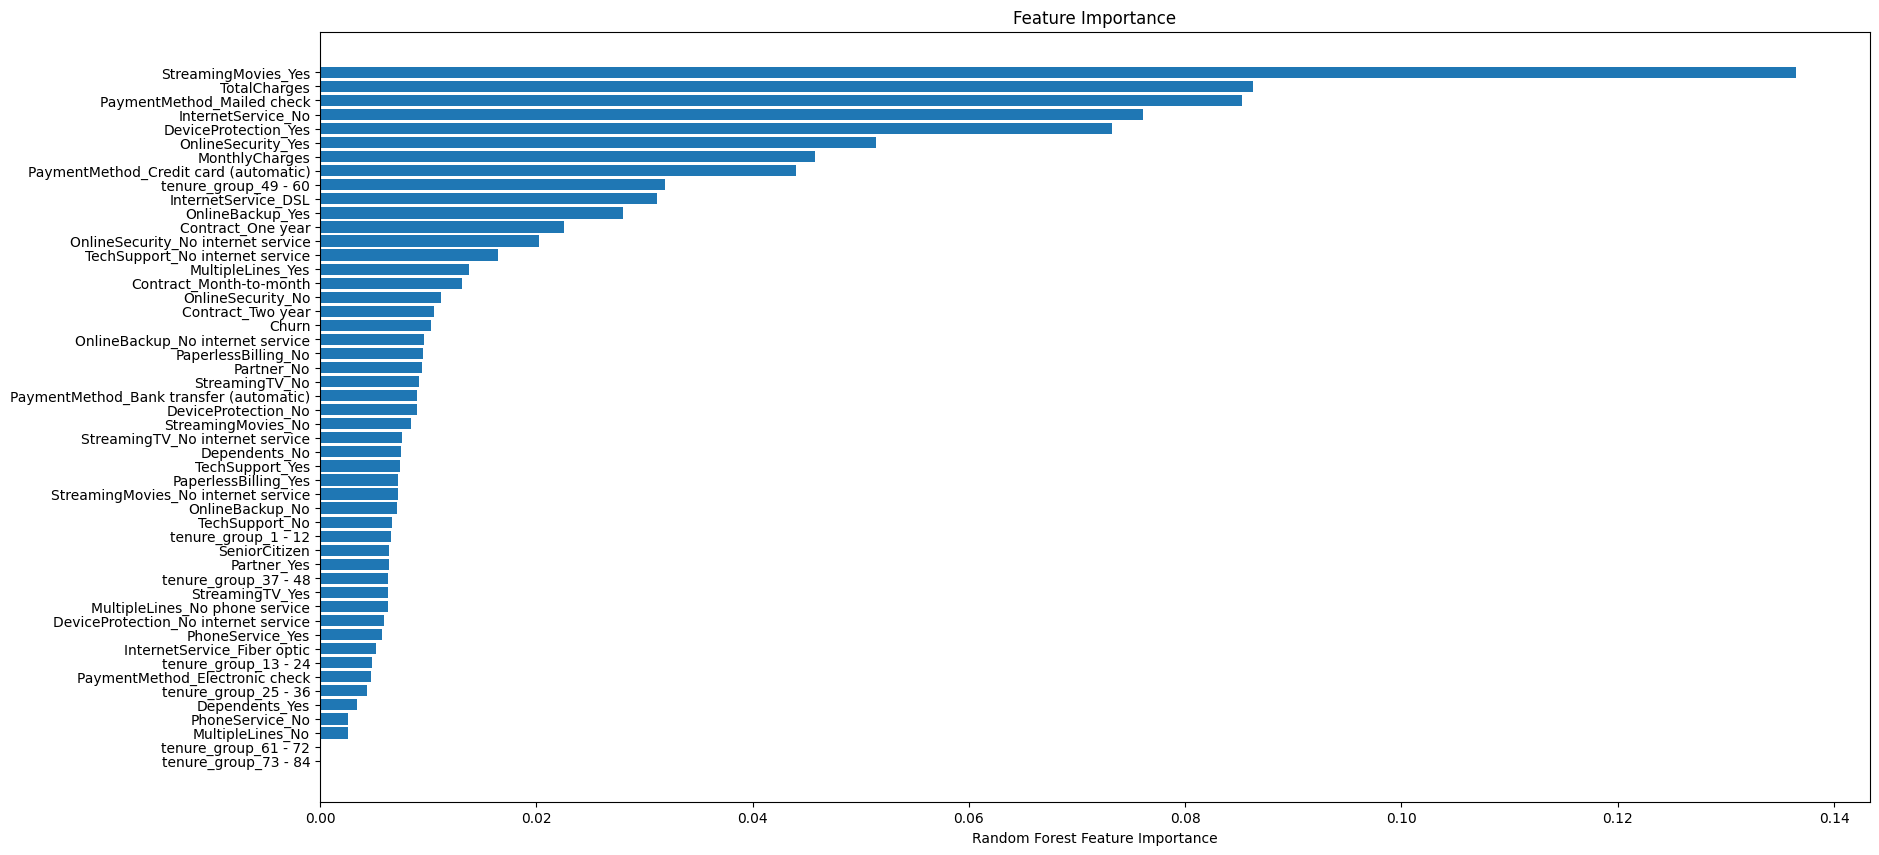

In [127]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(20,10))
plt.barh(df_dummies.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [128]:
xg.feature_importances_

array([0.00461961, 0.00658953, 0.00904034, 0.0073122 , 0.00878973,
       0.00570775, 0.        , 0.00851001, 0.        , 0.00348964,
       0.        , 0.00907304, 0.0805904 , 0.0604531 , 0.00133785,
       0.09506343, 0.        , 0.00820621, 0.03385608, 0.        ,
       0.00201602, 0.00811129, 0.        , 0.00664697, 0.01411464,
       0.        , 0.00268355, 0.00992782, 0.        , 0.00831279,
       0.00573869, 0.        , 0.00847379, 0.4187396 , 0.00711971,
       0.01311667, 0.00904723, 0.01092841, 0.00263607, 0.00607793,
       0.01338588, 0.00248243, 0.06552394, 0.00598893, 0.00371866,
       0.00532515, 0.00761636, 0.01962855, 0.        , 0.        ],
      dtype=float32)

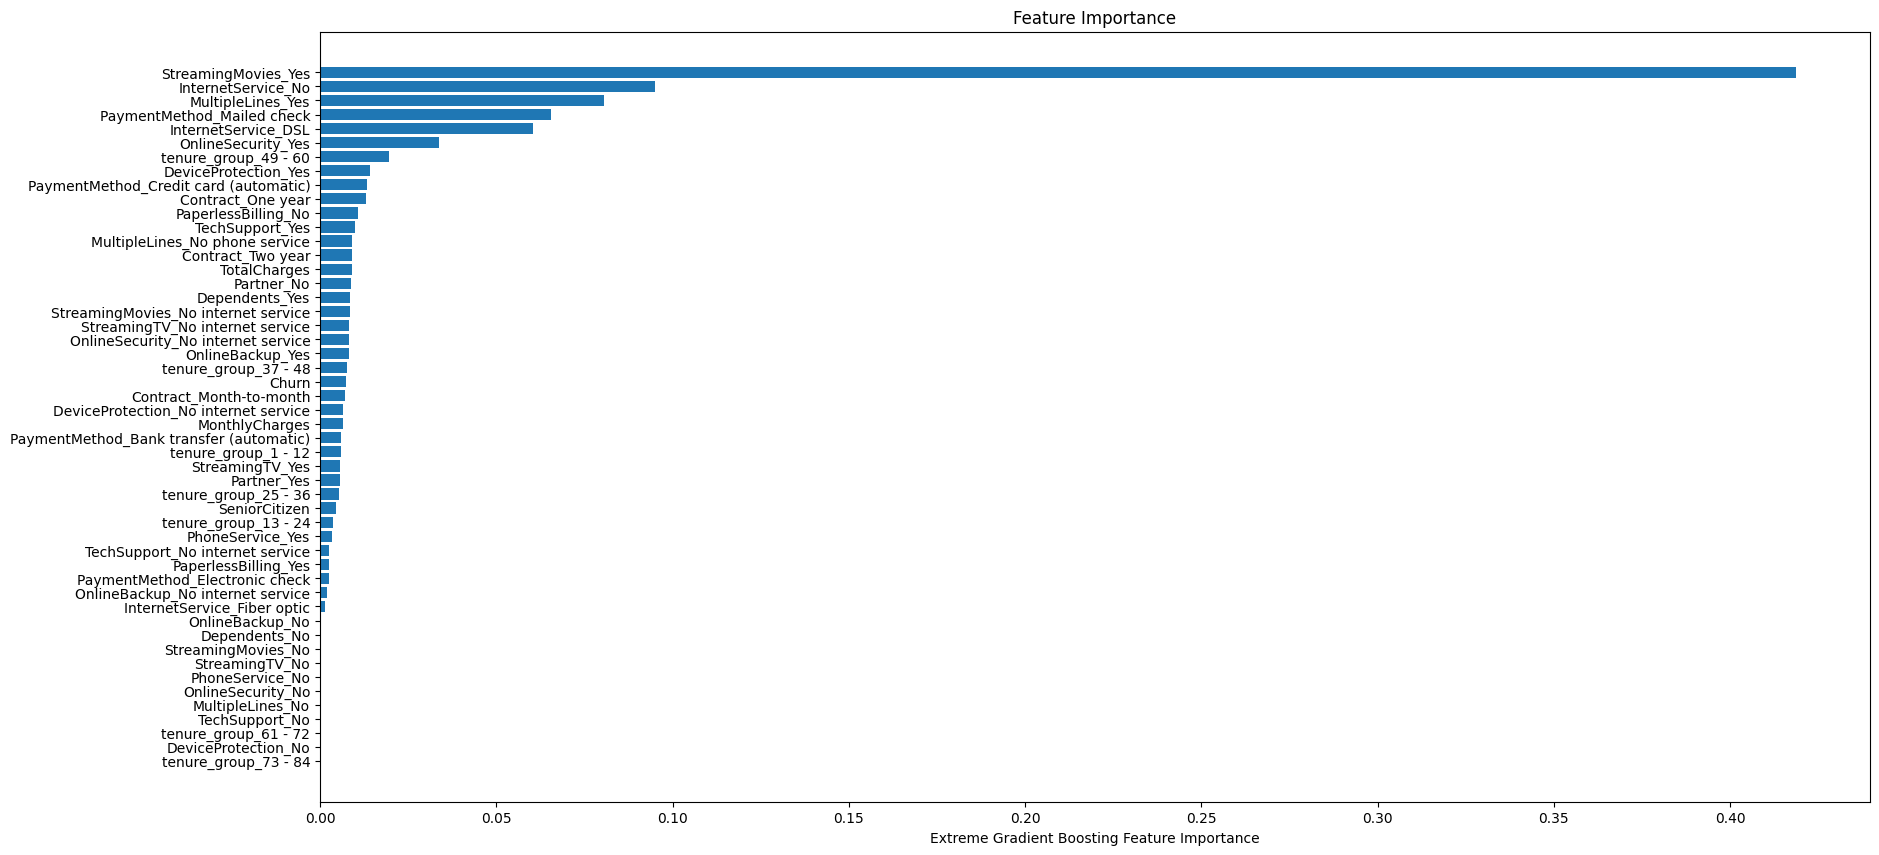

In [129]:
sorted_idx = xg.feature_importances_.argsort()
plt.figure(figsize=(20,10))
plt.barh(df_dummies.columns[sorted_idx], xg.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

### **suggestion to company**


Based on the feature importance given by Best Machine Learning Algorithm(Extreme Gradient Boosting)-Telecom Company should Focus on the features of order given below to reduce the customer churn count ✉:
1.   Streaming_Movies_Yes
2.   Internet_Service_No
3.   Multiple_Lines_Yes
4.   Internet_Service_DSL
5.   Payment_Method_Mailed_Check


In [53]:
import pickle

In [75]:
filename = 'model1.sav'

In [91]:
pickle.dump(xg,open(filename,'wb'))

In [92]:
load_model = pickle.load(open('model1.sav','rb'))

In [98]:
# Calculate the accuracy score
predictions = load_model.predict([[0, 283, 3540, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])
print(predictions)

[0]
